Data file Link: https://drive.google.com/drive/folders/1NnE9wnsJGZTGN0lE-mDUHem2s-nsWeaa?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("5G_Service.csv")

In [ ]:
df.head()

Timestamp User_ID   Application_Type Signal_Strength Latency  \
0  9/3/2023 10:00  User_1         Video_Call         -75 dBm   30 ms   
1  9/3/2023 10:00  User_2         Voice_Call         -80 dBm   20 ms   
2  9/3/2023 10:00  User_3          Streaming         -85 dBm   40 ms   
3  9/3/2023 10:00  User_4  Emergency_Service         -70 dBm   10 ms   
4  9/3/2023 10:00  User_5      Online_Gaming         -78 dBm   25 ms   

  Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
0            10 Mbps             15 Mbps                 70%  
1           100 Kbps            120 Kbps                 80%  
2             5 Mbps              6 Mbps                 75%  
3             1 Mbps            1.5 Mbps                 90%  
4             2 Mbps              3 Mbps                 85%

In [ ]:
df.tail()

Timestamp   User_ID   Application_Type Signal_Strength Latency  \
395  9/3/2023 10:06  User_396          Streaming        -110 dBm   61 ms   
396  9/3/2023 10:06  User_397         Video_Call         -40 dBm   53 ms   
397  9/3/2023 10:06  User_398    Video_Streaming        -113 dBm   58 ms   
398  9/3/2023 10:06  User_399  Emergency_Service         -40 dBm    5 ms   
399  9/3/2023 10:06  User_400       Web_Browsing        -113 dBm    0 ms   

    Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
395           1.3 Mbps            1.8 Mbps                 85%  
396          14.5 Mbps           15.8 Mbps                 75%  
397           1.0 Mbps            1.4 Mbps                 70%  
398           0.4 Mbps            0.4 Mbps                 70%  
399           0.1 Mbps            0.1 Mbps                 70%

In [ ]:
df.columns

Index(['Timestamp', 'User_ID', 'Application_Type', 'Signal_Strength',
       'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth',
       'Resource_Allocation'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [ ]:
df.nunique()

Timestamp                7
User_ID                400
Application_Type        11
Signal_Strength         84
Latency                 87
Required_Bandwidth     188
Allocated_Bandwidth    194
Resource_Allocation      9
dtype: int64

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    object        
 2   Application_Type     400 non-null    object        
 3   Signal_Strength      400 non-null    object        
 4   Latency              400 non-null    object        
 5   Required_Bandwidth   400 non-null    object        
 6   Allocated_Bandwidth  400 non-null    object        
 7   Resource_Allocation  400 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 25.1+ KB


In [ ]:
df.describe()

Timestamp
count                  400
mean   2023-09-03 10:03:00
min    2023-09-03 10:00:00
25%    2023-09-03 10:01:00
50%    2023-09-03 10:03:00
75%    2023-09-03 10:05:00
max    2023-09-03 10:06:00

In [ ]:
data.describe().T

count unique             top freq
Timestamp             400      7  9/3/2023 10:01   60
User_ID               400    400          User_1    1
Application_Type      400     11      Video_Call   58
Signal_Strength       400     84         -97 dBm    9
Latency               400     87            5 ms   35
Required_Bandwidth    400    188        0.1 Mbps   16
Allocated_Bandwidth   400    194        0.1 Mbps   16
Resource_Allocation   400      9             70%  148

In [ ]:
# Remove units and convert columns to numerical types
df['Signal_Strength'] = df['Signal_Strength'].str.replace(r'[^\d.-]', '', regex=True).astype(float)
df['Latency'] = df['Latency'].str.replace(r'[^\d.-]', '', regex=True).astype(float)
df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(r'[^\d.-]', '', regex=True).astype(float)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(r'[^\d.-]', '', regex=True).astype(float)
df['Resource_Allocation'] = df['Resource_Allocation'].str.replace(r'[^\d.-]', '', regex=True).astype(float)

# Get a list of columns with object (categorical) data types
object_columns = df.select_dtypes(include='object').columns.tolist()

# Get a list of columns with numerical (int or float) data types
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Print the lists of columns
print("Object columns:", object_columns)
print("Numerical columns:", numerical_columns)


Object columns: ['User_ID', 'Application_Type']
Numerical columns: ['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Resource_Allocation']


In [ ]:
df['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [ ]:
df['Application_Type'].value_counts()

Application_Type
Video_Call             58
Web_Browsing           48
Streaming              47
Emergency_Service      47
Background_Download    47
Video_Streaming        47
VoIP_Call              46
Online_Gaming          45
IoT_Temperature        13
Voice_Call              1
File_Download           1
Name: count, dtype: int64

Visualizing Data Distribution for: Application Type


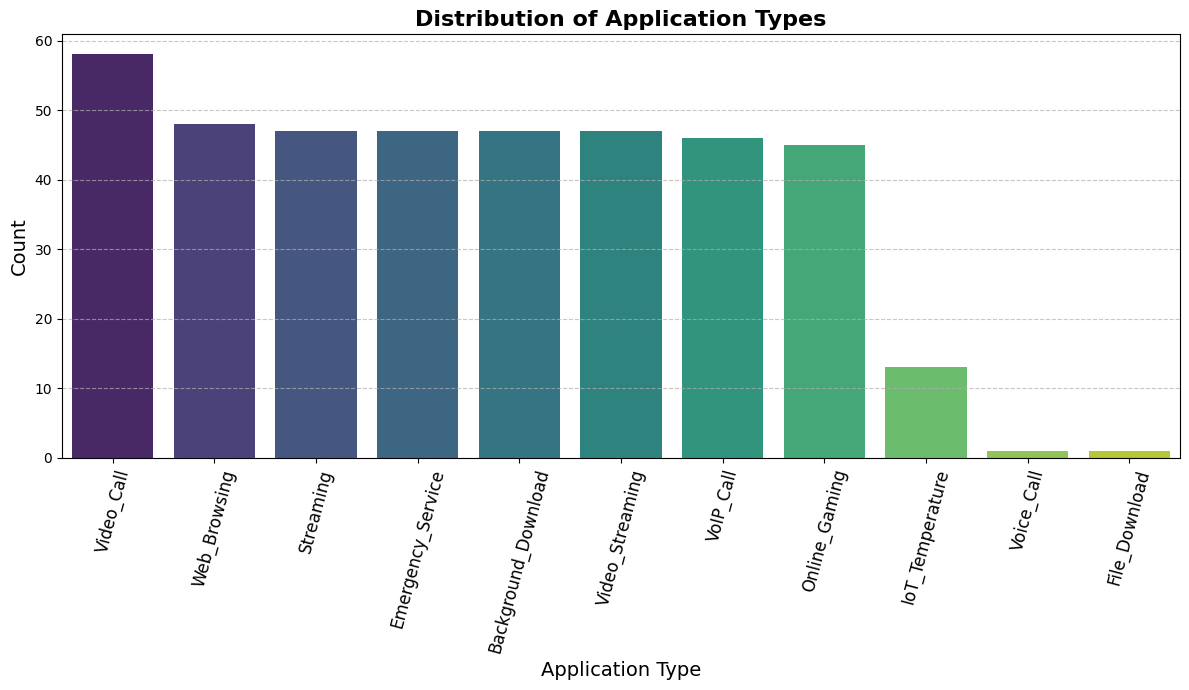

In [ ]:
print("Visualizing Data Distribution for: Application Type")
plt.figure(figsize=(12, 7))  # Adjusted figure size for better differentiation
sns.barplot(x=df['Application_Type'].value_counts().index,
            y=df['Application_Type'].value_counts().values,
            palette='viridis')  # Changed palette and method
plt.xlabel('Application Type', fontsize=14)  # Explicitly labeled the x-axis
plt.ylabel('Count', fontsize=14)  # Explicitly labeled the y-axis
plt.title('Distribution of Application Types', fontsize=16, fontweight='bold')  # Added a title
plt.xticks(rotation=75, fontsize=12)  # Adjusted rotation and font size for readability
plt.tight_layout()  # Ensure the layout looks clean
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added gridlines for better visual clarity
plt.show()


In [ ]:
# Create the pie chart using Plotly Express
fig = px.pie(df, names='Application_Type', title='Distribution of Application Types')

# Show the pie chart
fig.show()


Numerical columns: ['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Resource_Allocation']


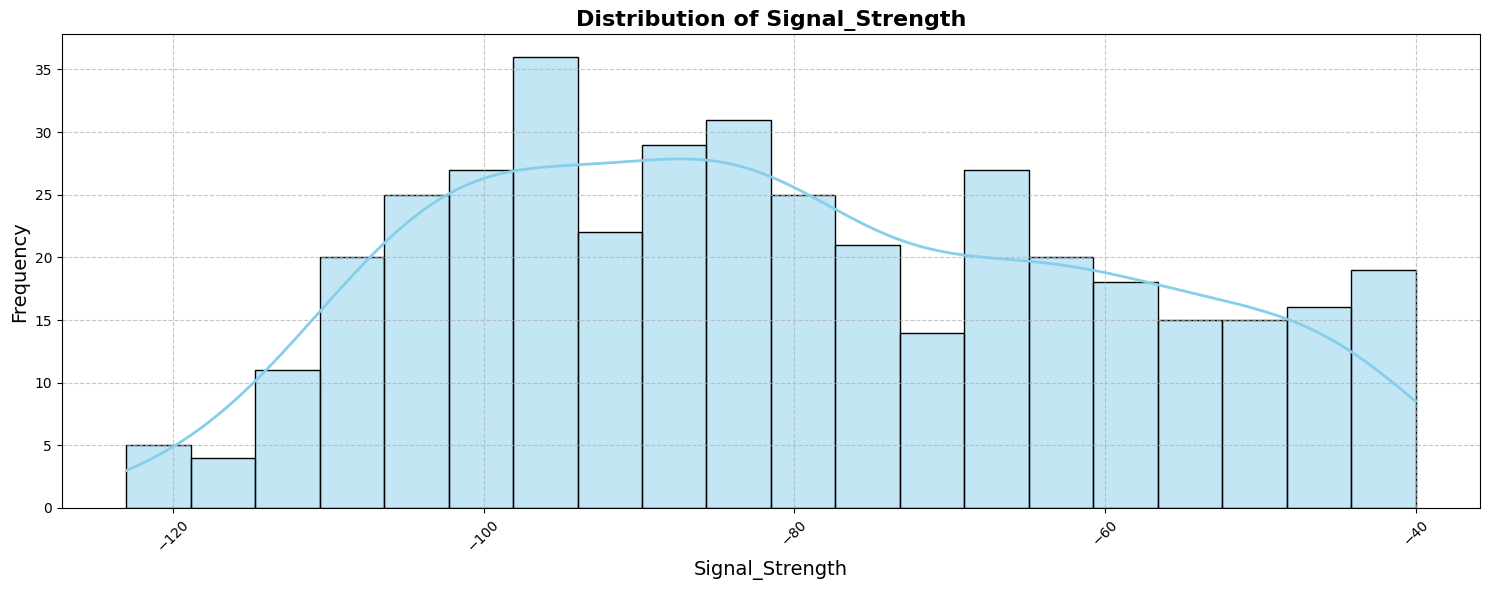

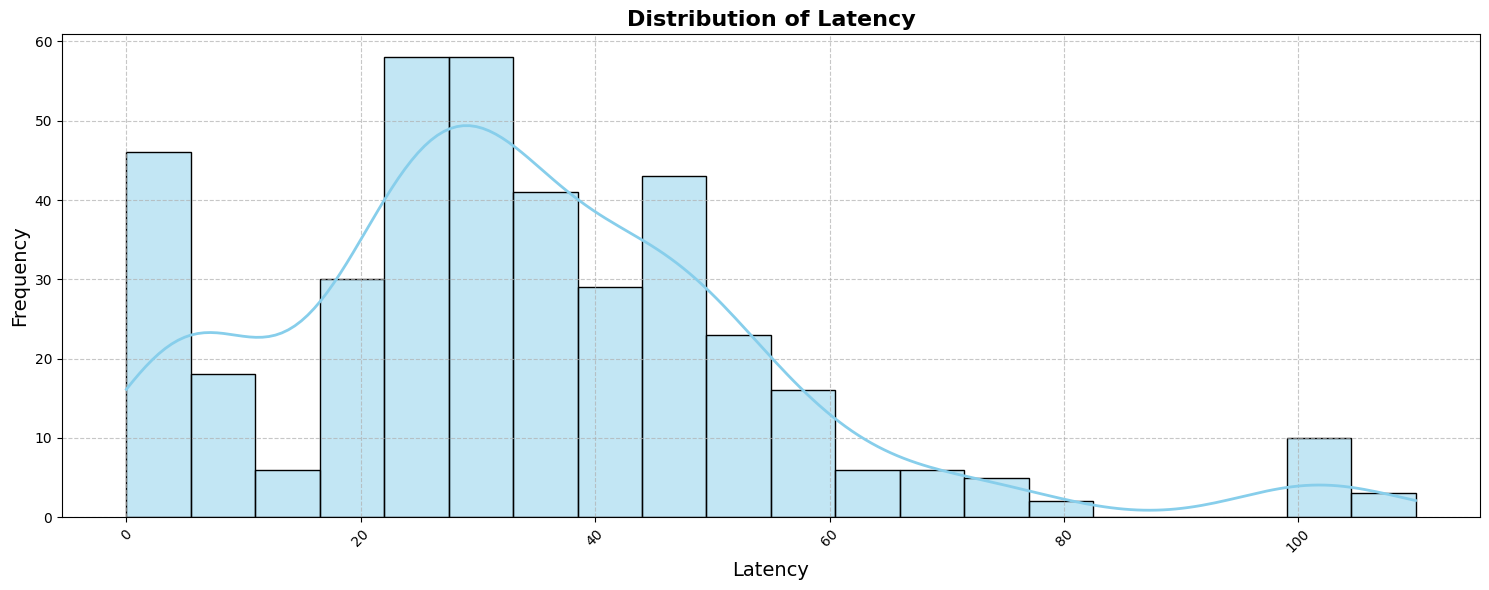

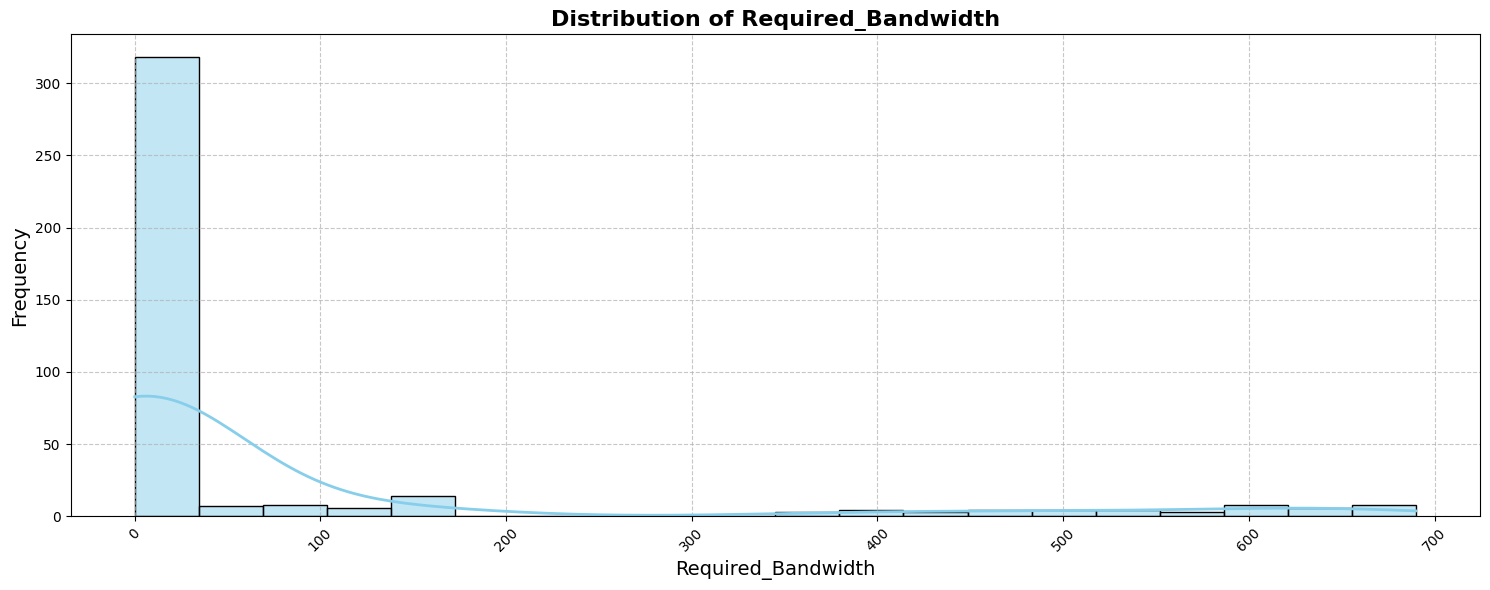

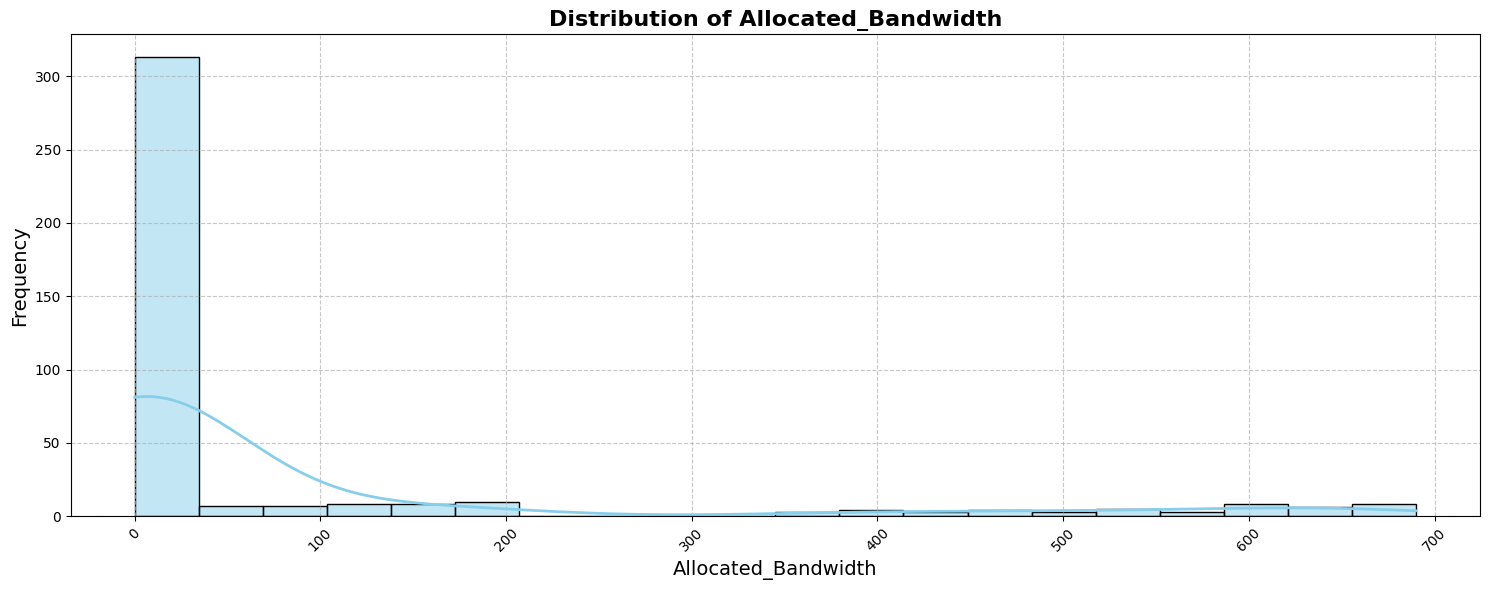

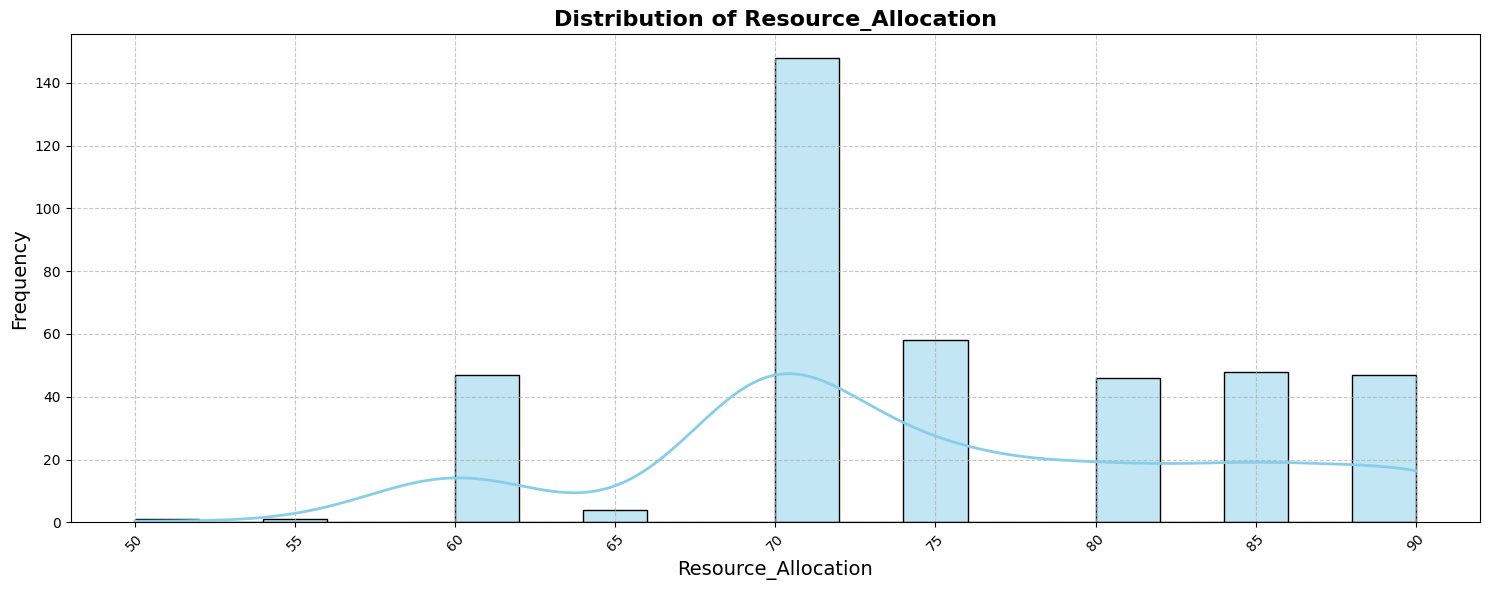

In [ ]:
# Assuming numerical_columns is a list of numerical column names
# Print the list of numerical columns to verify
print("Numerical columns:", numerical_columns)

# Check if the list of numerical columns is not empty
if numerical_columns:
    # Iterate over each numerical column
    for column in numerical_columns:
        if column in df.columns:  # Ensure the column exists in the DataFrame
            plt.figure(figsize=(15, 6))  # Create a new figure for each plot
            # Plot the histogram with KDE
            sns.histplot(df[column], kde=True, bins=20, color='skyblue', line_kws={'color': 'red', 'linewidth': 2})
            plt.xticks(rotation=45)  # Rotate x-axis ticks for better readability
            plt.title(f"Distribution of {column}", fontsize=16, fontweight='bold')  # Title with larger font
            plt.xlabel(f'{column}', fontsize=14)  # Add xlabel with larger font
            plt.ylabel('Frequency', fontsize=14)  # Add ylabel with larger font
            plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid with dashed lines for clarity
            plt.tight_layout()  # Adjust layout to prevent clipping
            plt.show()  # Display the plot
        else:
            print(f"Warning: Column '{column}' not found in the DataFrame.")
else:
    print("No numerical columns found in 'numerical_columns'. Please check the list.")


Numerical columns: ['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Resource_Allocation']


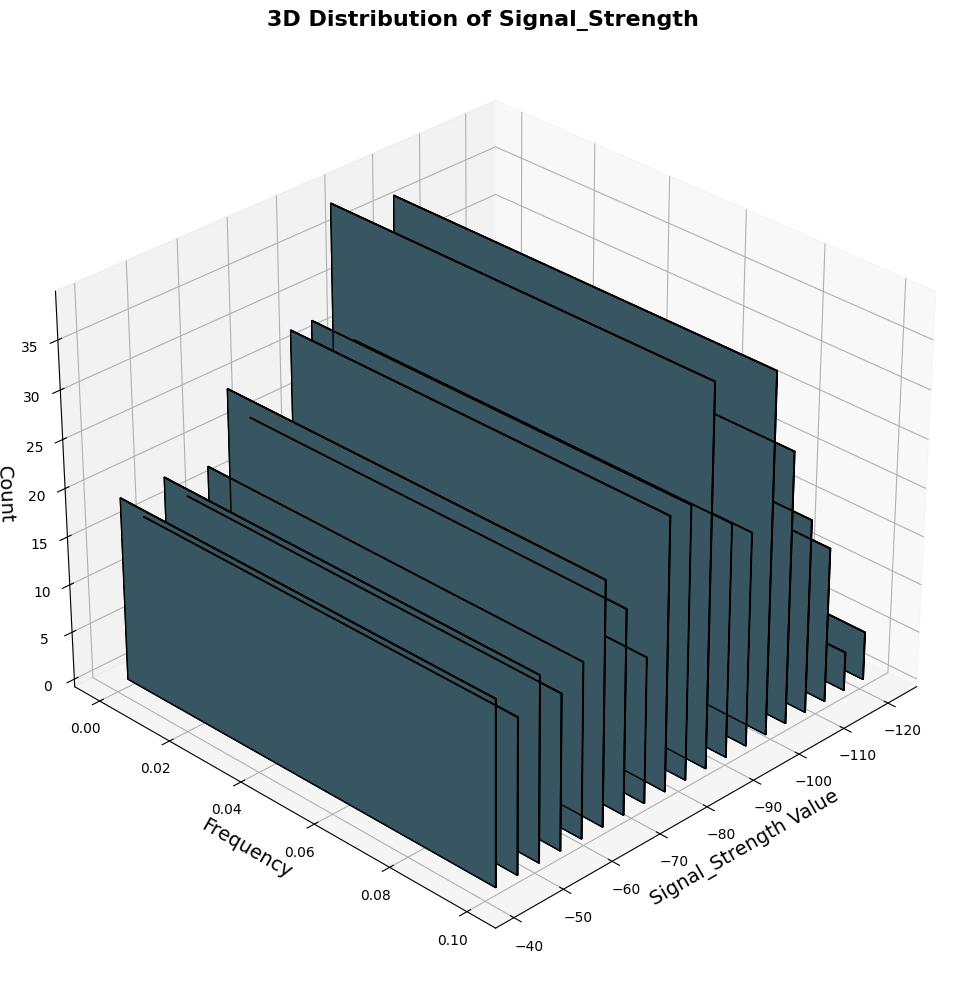

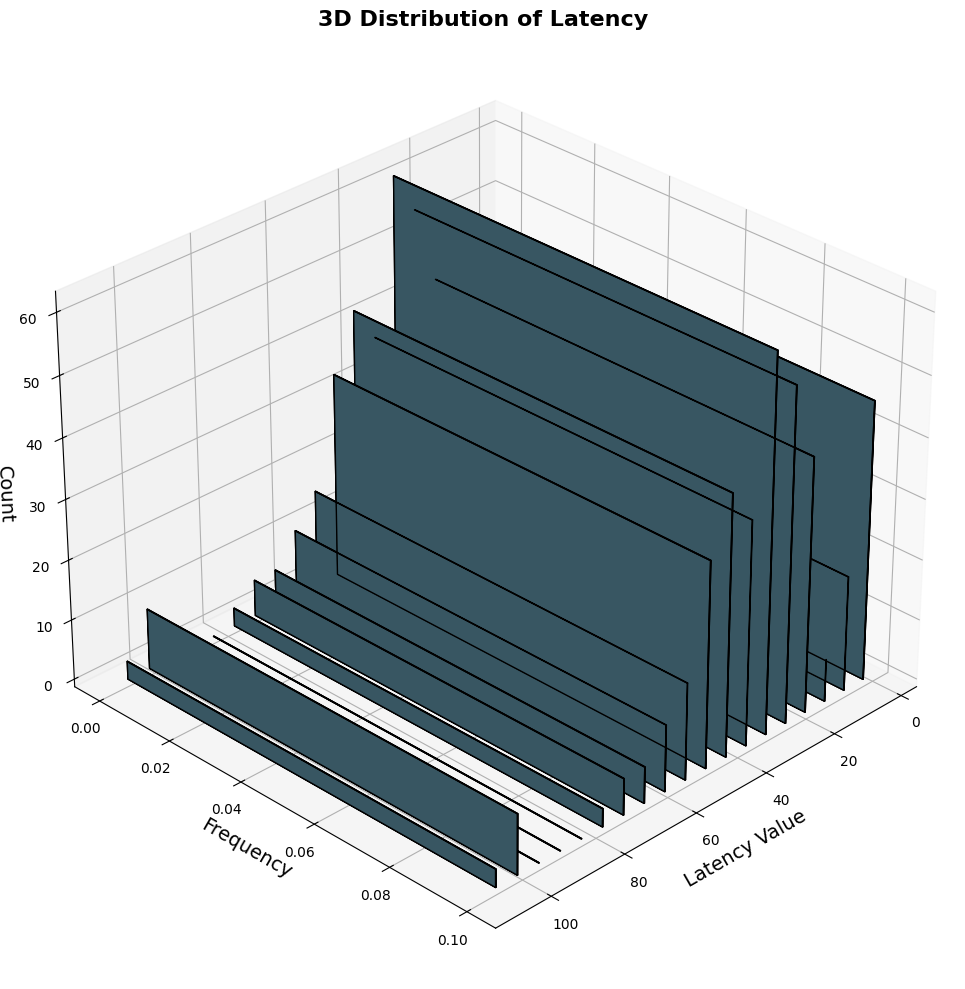

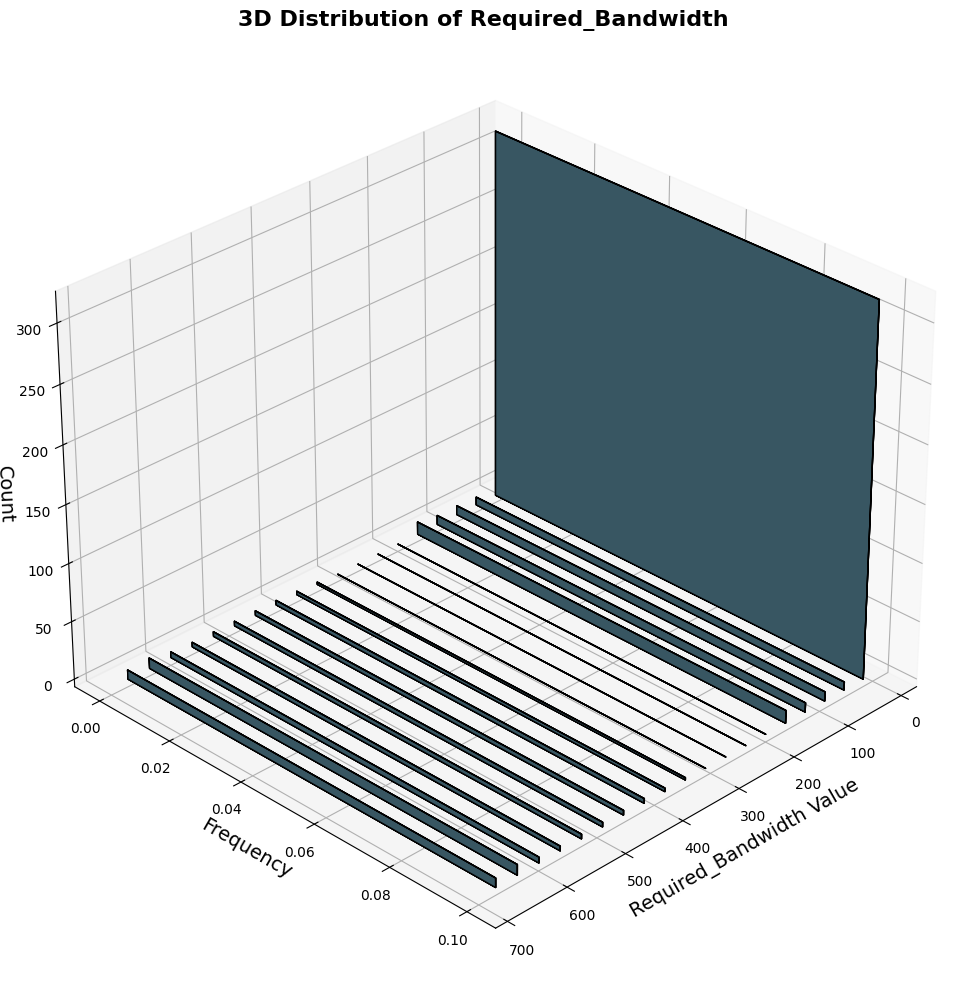

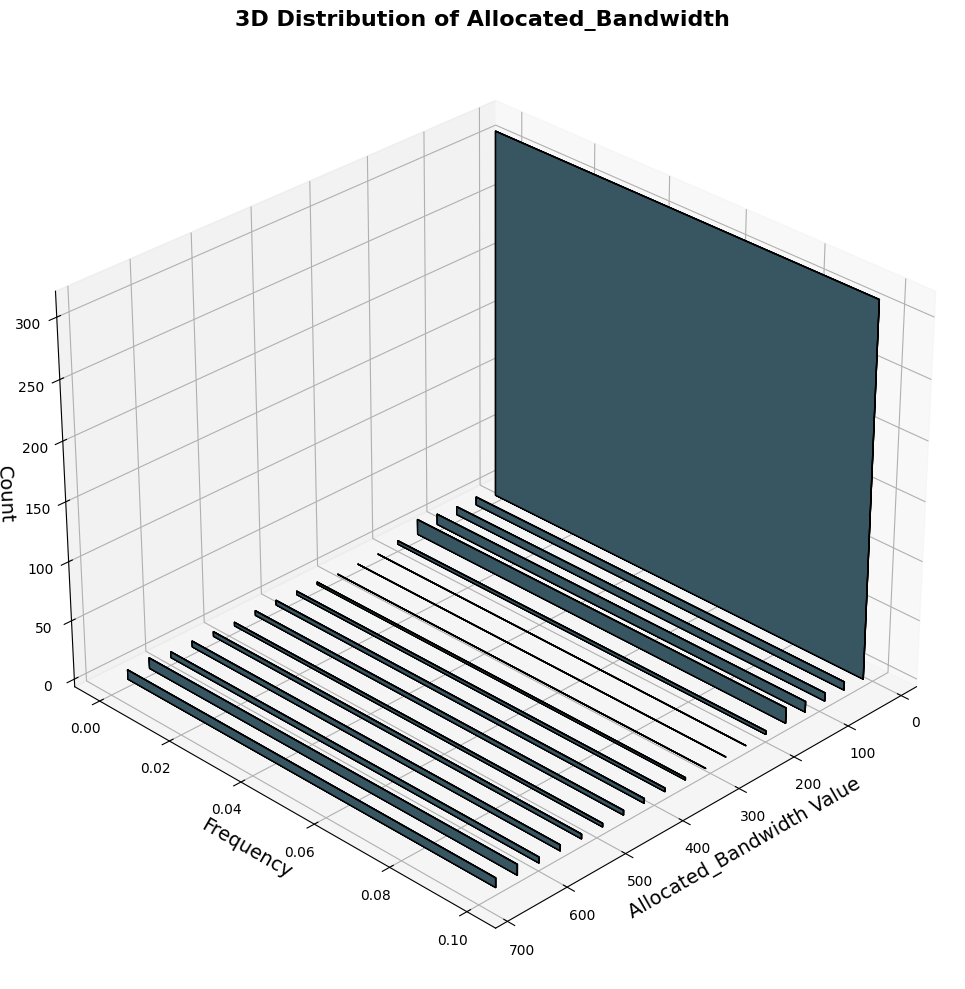

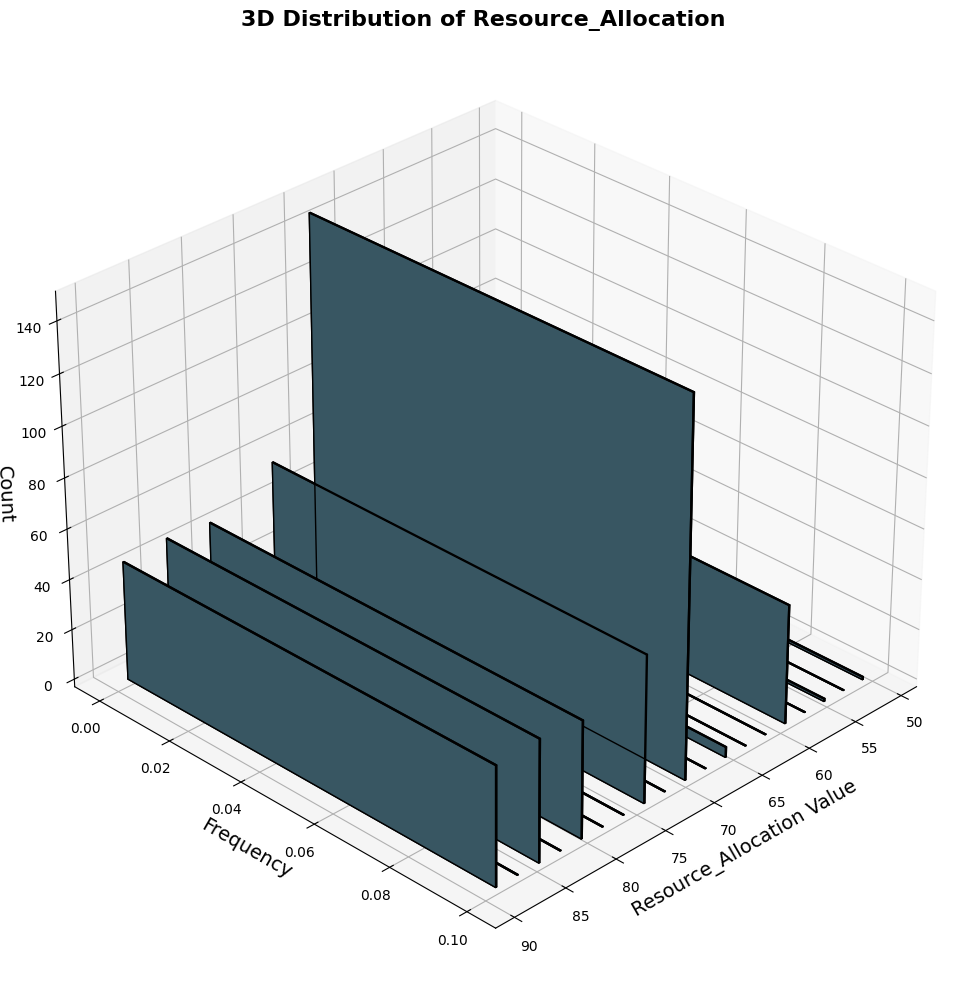

In [ ]:
# Assuming numerical_columns is a list of numerical column names
# Print the list of numerical columns to verify
print("Numerical columns:", numerical_columns)

# Check if the list of numerical columns is not empty
if numerical_columns:
    for column in numerical_columns:
        if column in df.columns:  # Ensure the column exists in the DataFrame
            # Get data for the column
            data = df[column].dropna()  # Remove NaN values if any

            # Create a 3D figure
            fig = plt.figure(figsize=(15, 8))
            ax = fig.add_subplot(111, projection='3d')

            # Create the histogram data
            bins = np.linspace(data.min(), data.max(), 20)  # Define bins
            hist, edges = np.histogram(data, bins=bins)

            # Define the x and y positions of the bars
            xpos = (edges[:-1] + edges[1:]) / 2  # Midpoint of bins
            ypos = np.zeros_like(xpos)  # All bars are aligned on the y-axis

            # Create 3D bars
            ax.bar3d(xpos, ypos, np.zeros_like(xpos), 0.1, 0.1, hist, color='skyblue', edgecolor='black')

            # Customize labels and title
            ax.set_title(f"3D Distribution of {column}", fontsize=16, fontweight='bold')
            ax.set_xlabel(f'{column} Value', fontsize=14)
            ax.set_ylabel('Frequency', fontsize=14)
            ax.set_zlabel('Count', fontsize=14)

            # Rotate the view for better perspective
            ax.view_init(elev=30, azim=45)

            # Show the plot
            plt.tight_layout()
            plt.show()
        else:
            print(f"Warning: Column '{column}' not found in the DataFrame.")
else:
    print("No numerical columns found in 'numerical_columns'. Please check the list.")

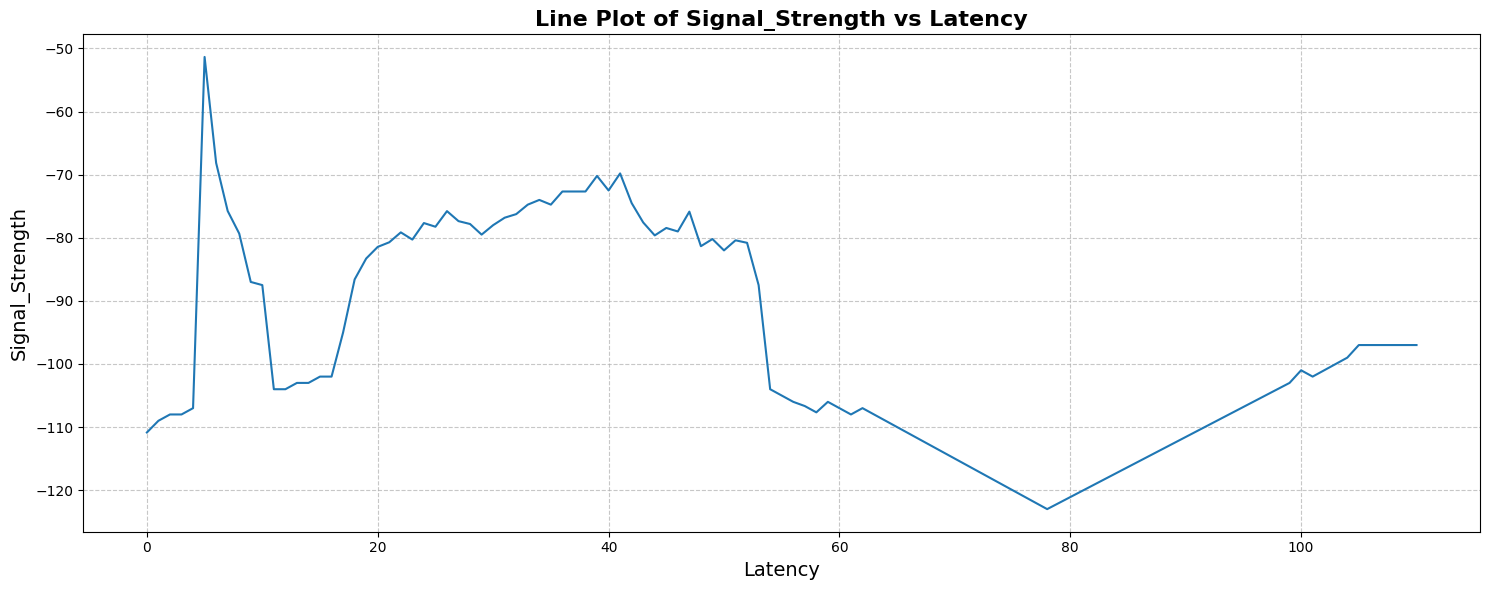

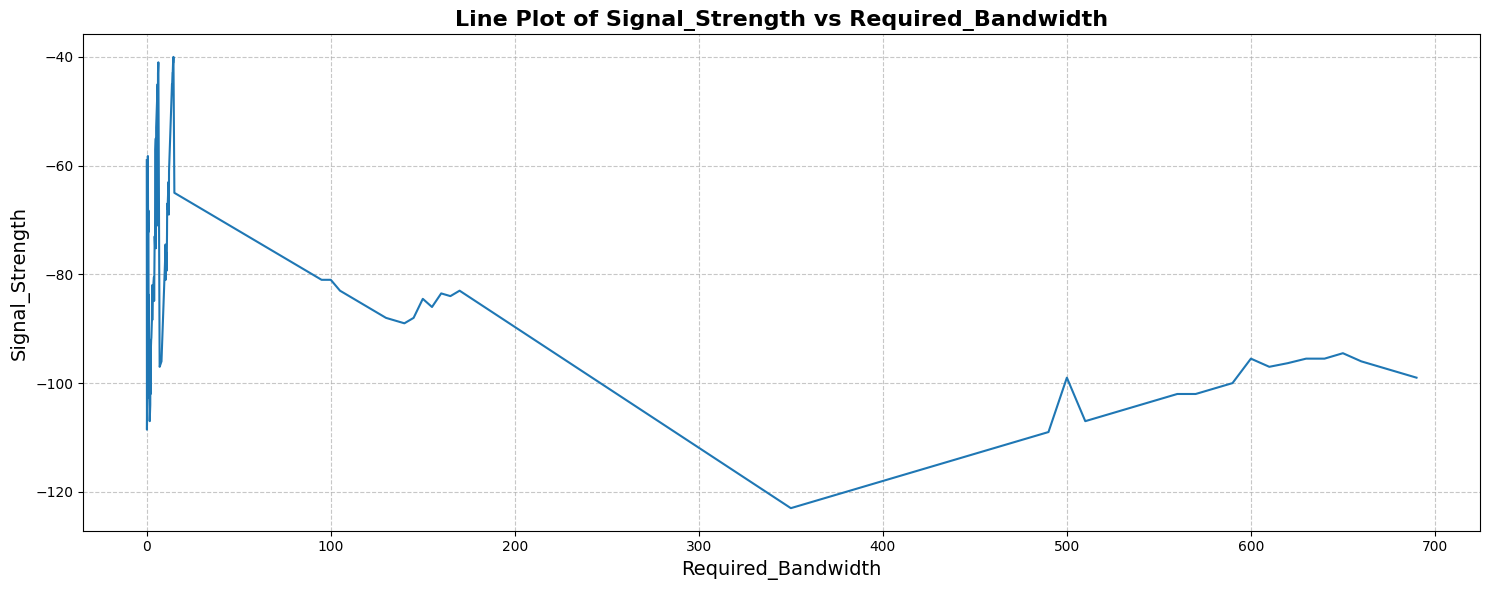

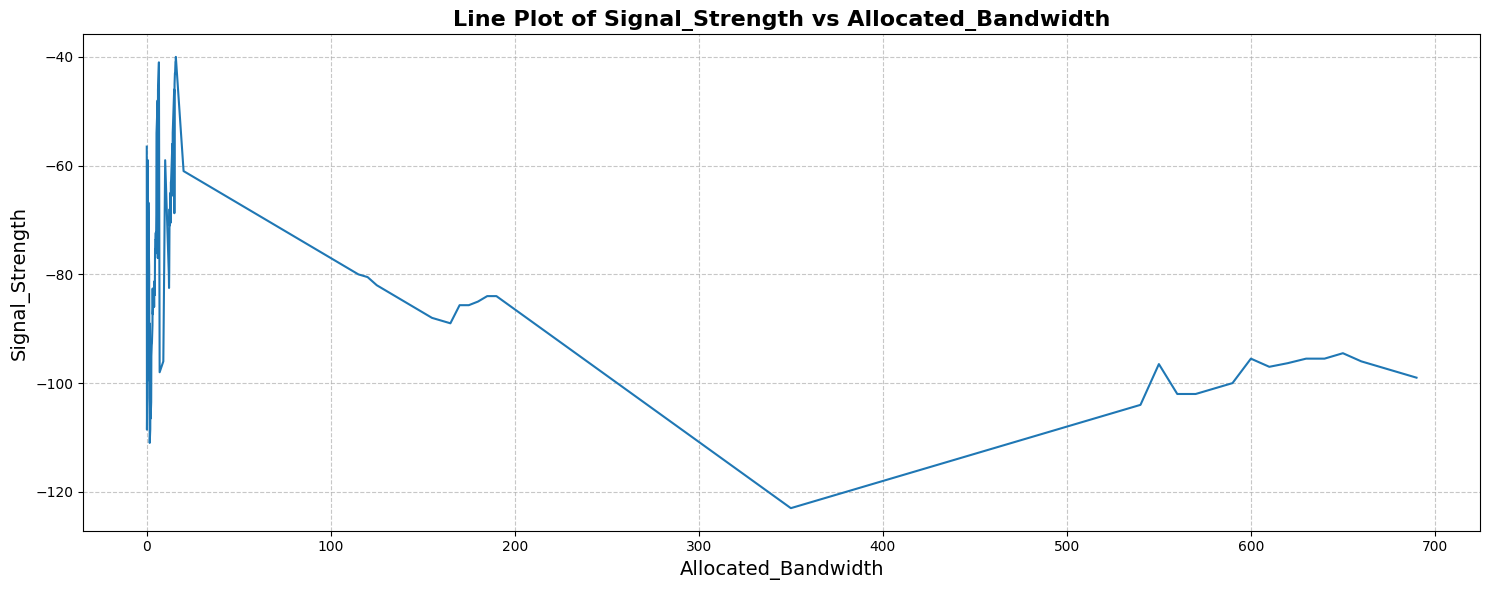

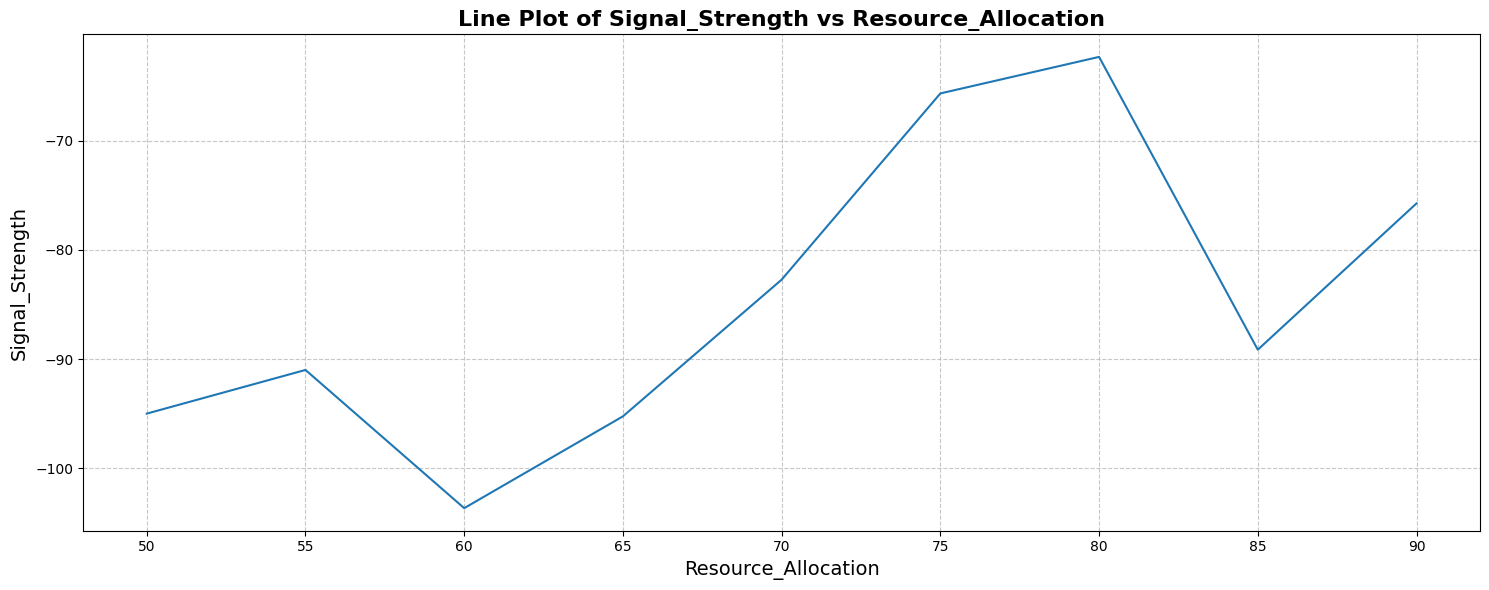

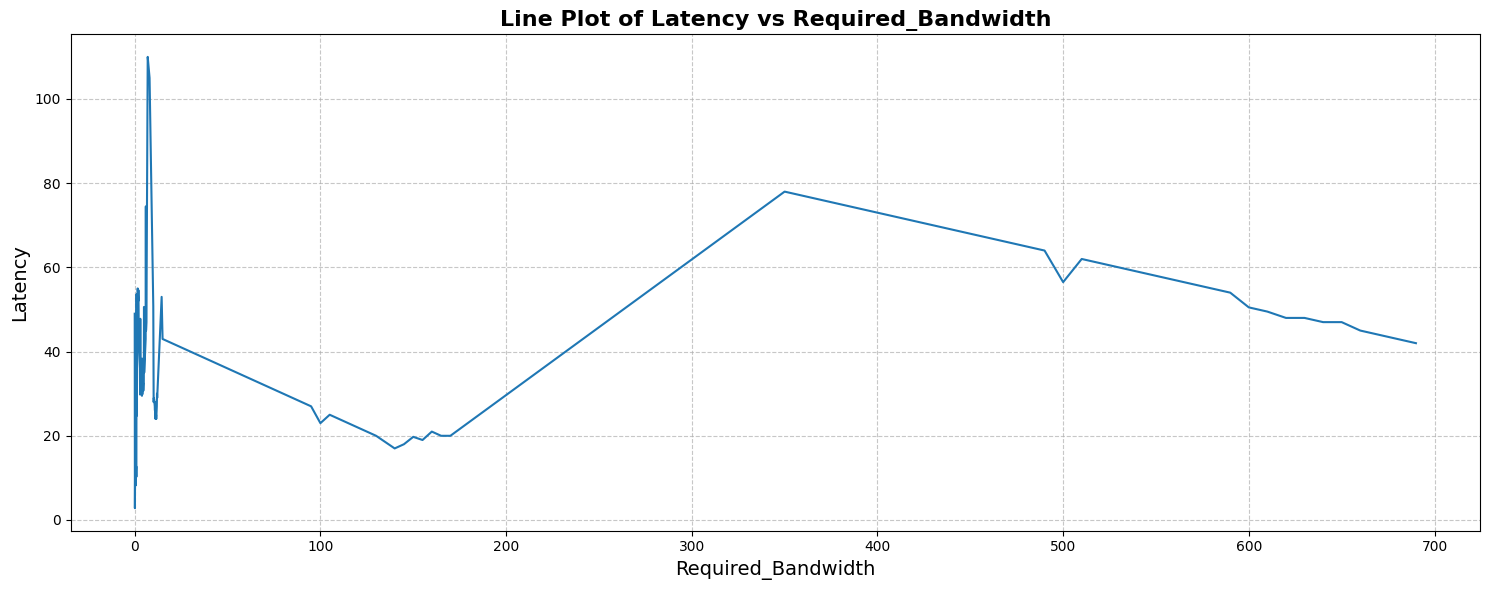

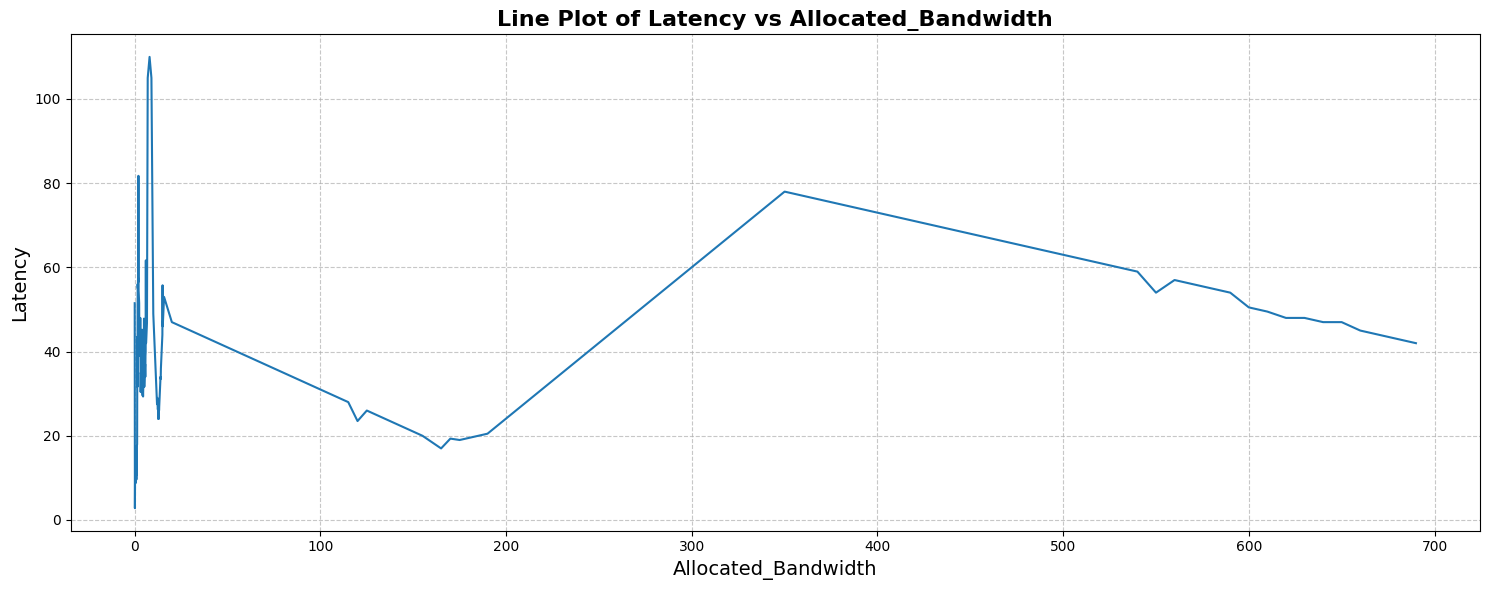

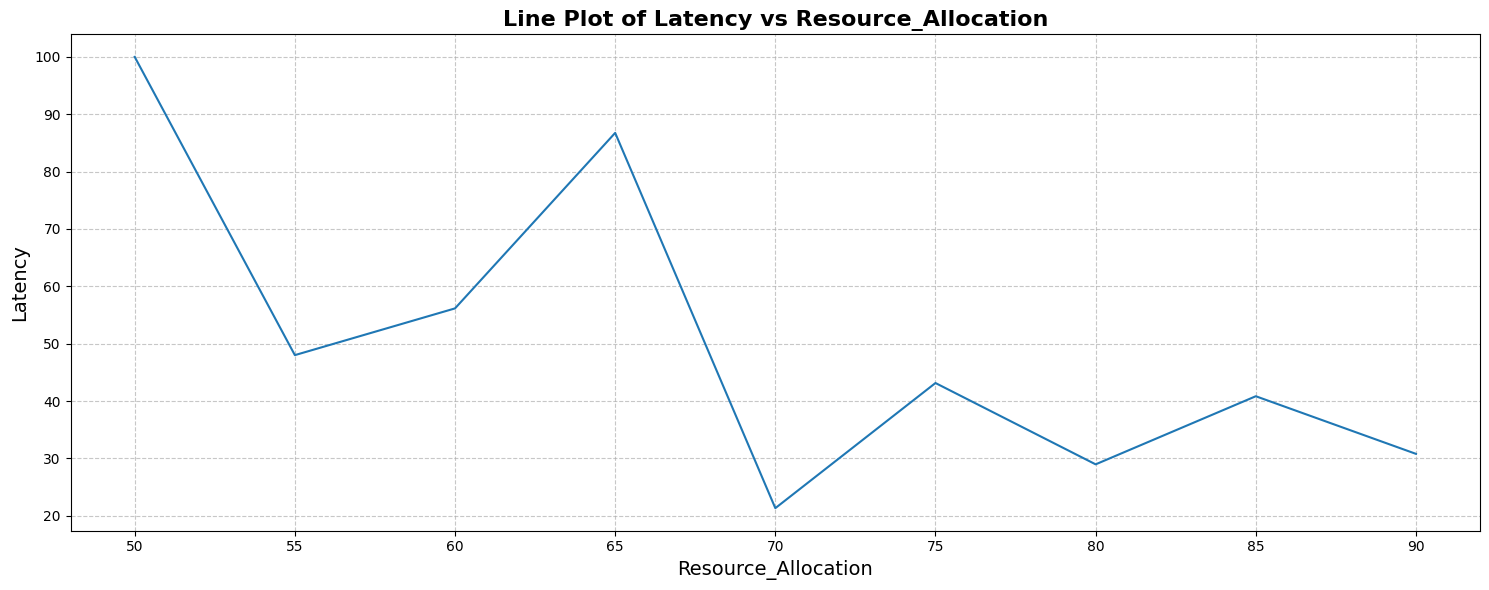

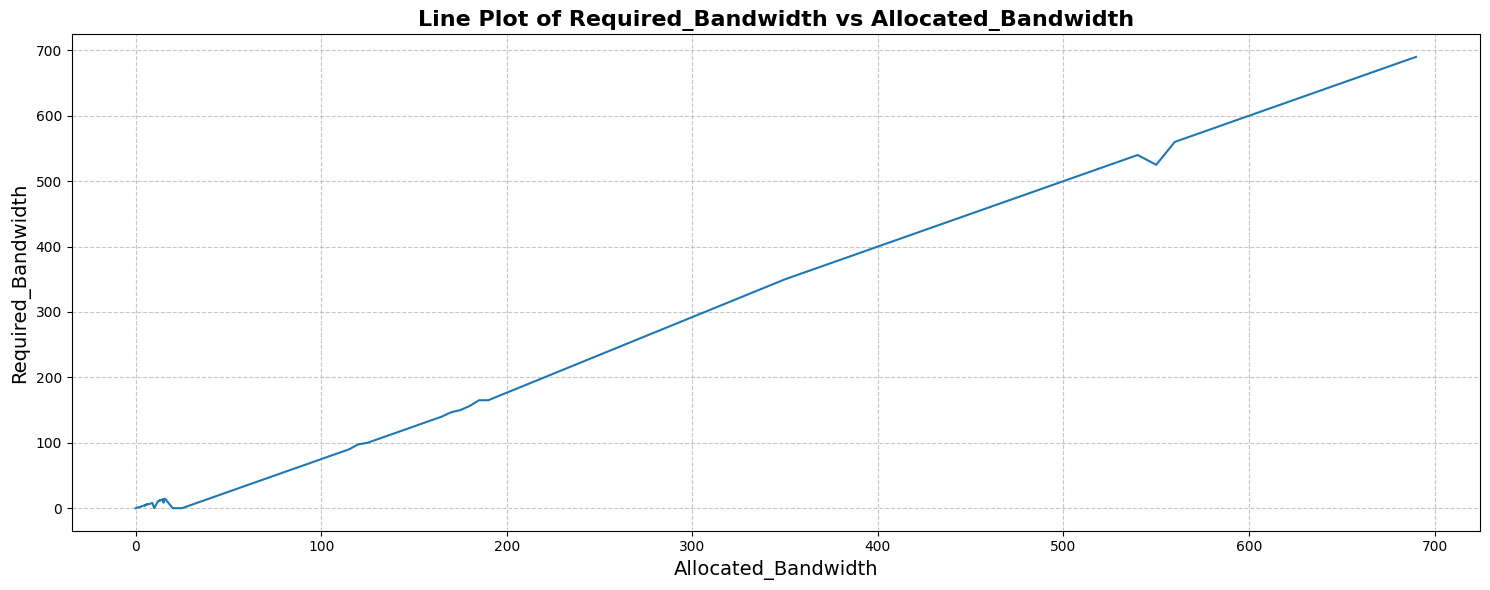

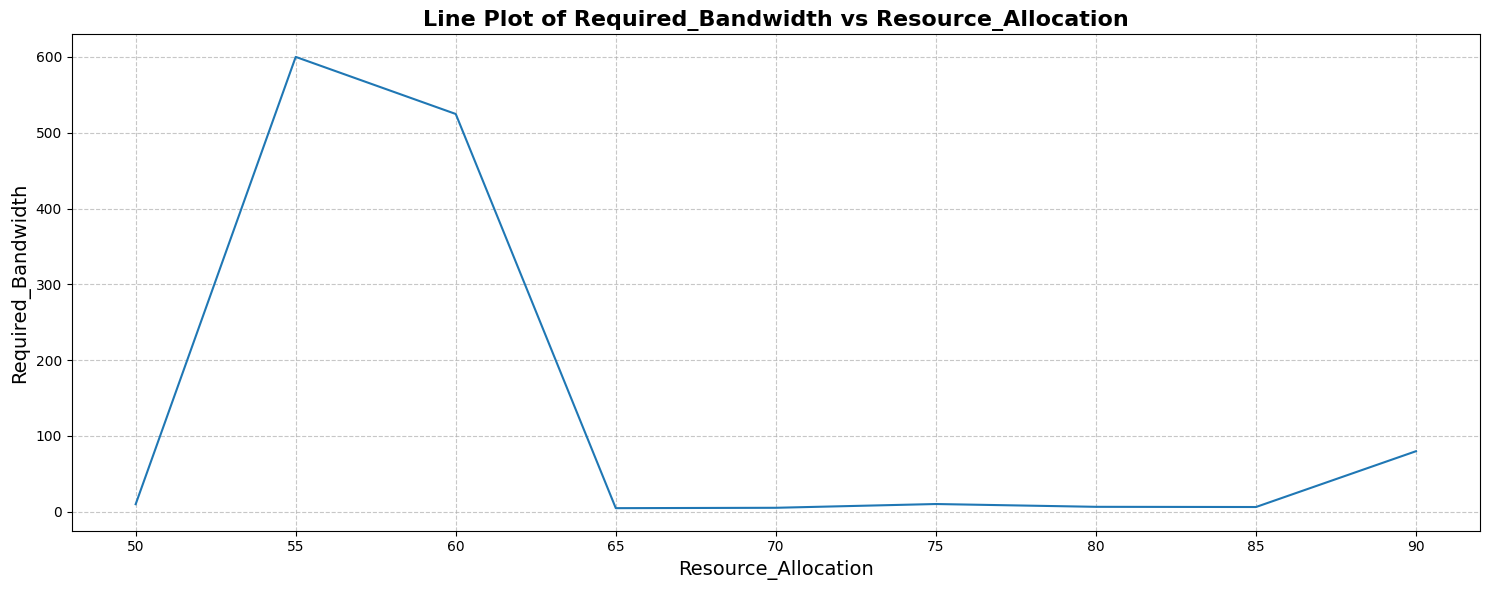

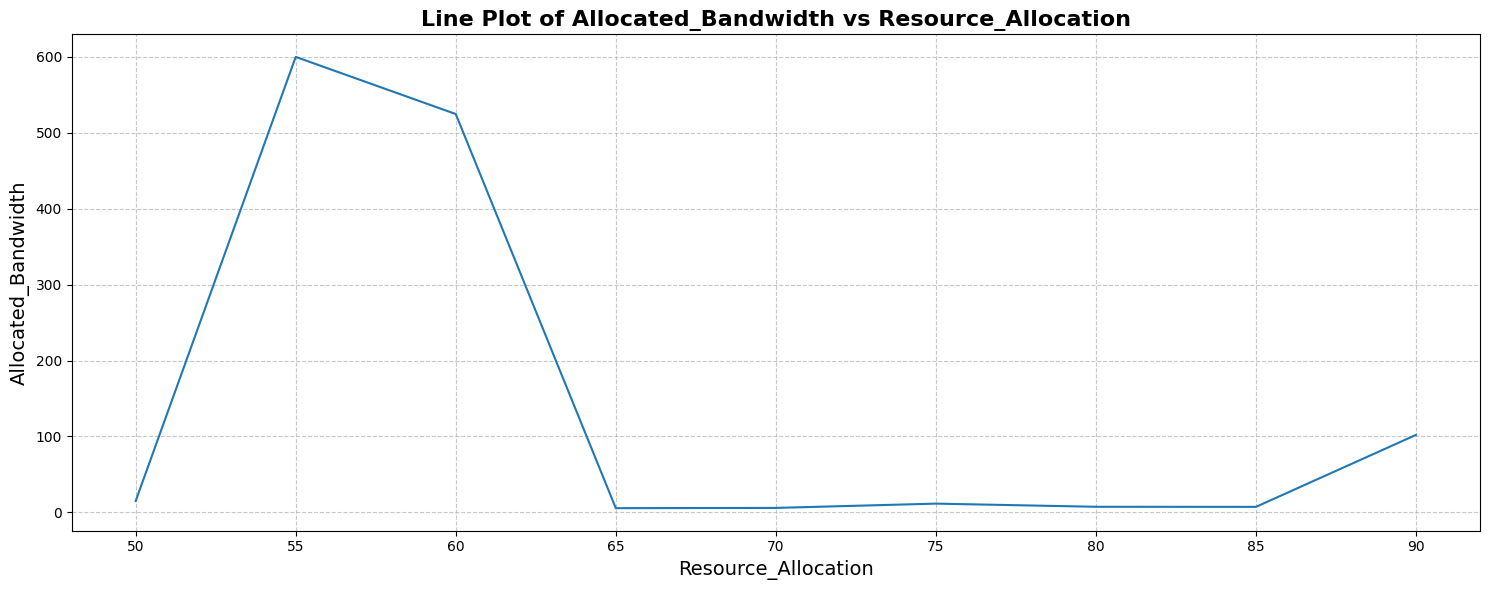

In [ ]:
# Loop through numerical columns to create pairwise line plots
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):  # Ensures unique pairs (i, j) and avoids redundancy
        plt.figure(figsize=(15, 6))  # Set figure size for each plot
        sns.lineplot(
            x=df[numerical_columns[j]],  # X-axis data
            y=df[numerical_columns[i]],  # Y-axis data
            data=df,  # Dataframe used
            ci=None,  # Disable confidence intervals
            palette='tab10'  # Choose a color palette for better visualization
        )

        # Add titles, labels, and grid for clarity
        plt.title(f"Line Plot of {numerical_columns[i]} vs {numerical_columns[j]}", fontsize=16, fontweight='bold')
        plt.xlabel(f'{numerical_columns[j]}', fontsize=14)
        plt.ylabel(f'{numerical_columns[i]}', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
        plt.tight_layout()  # Adjust layout to prevent clipping
        plt.show()  # Display the plot


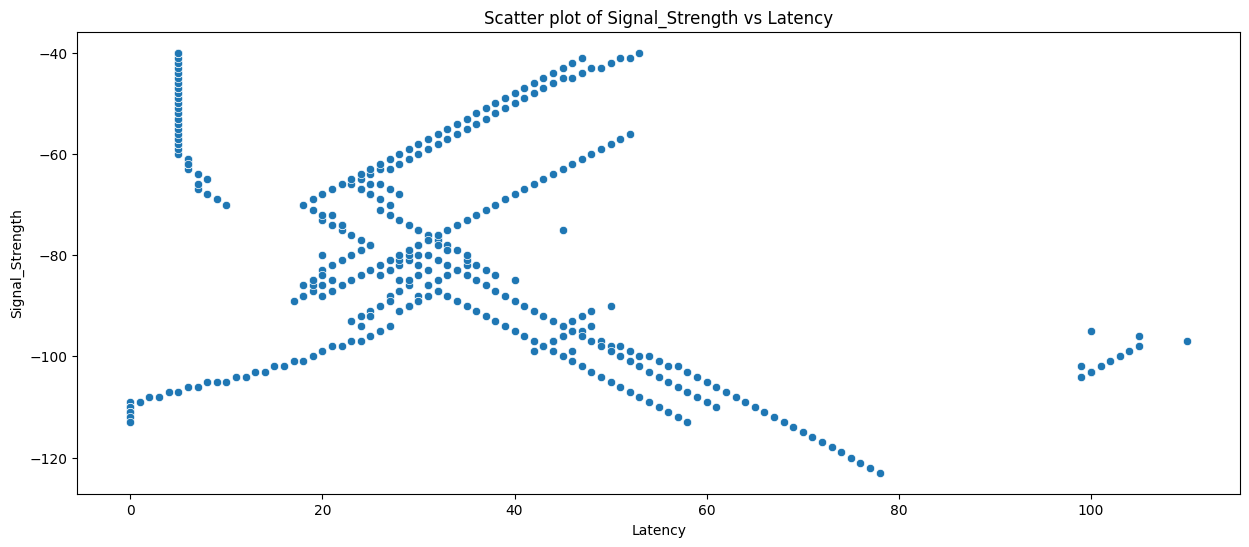

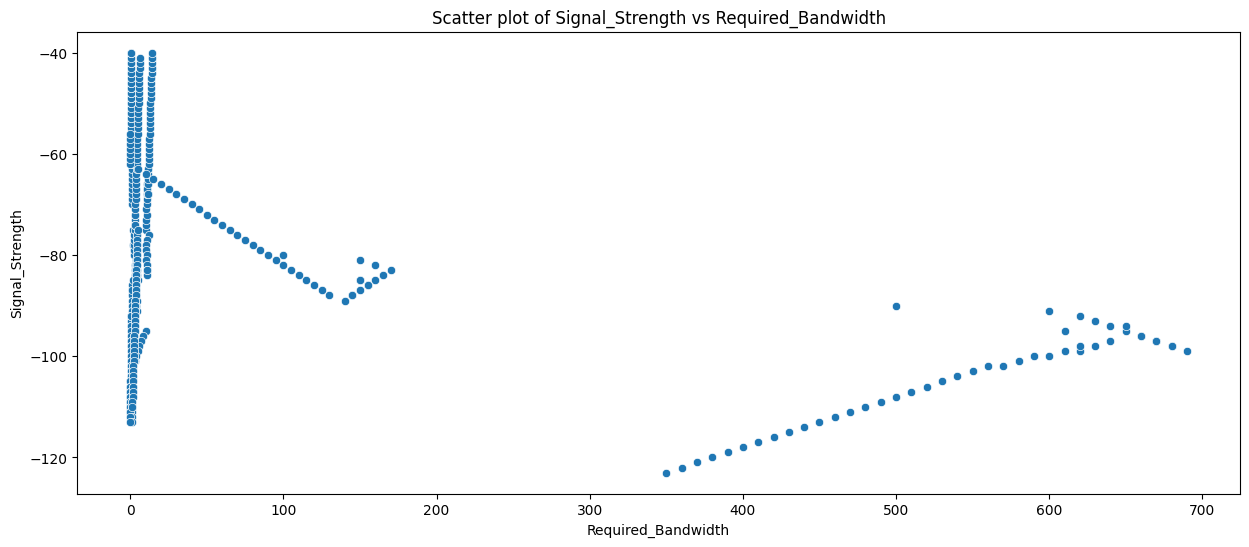

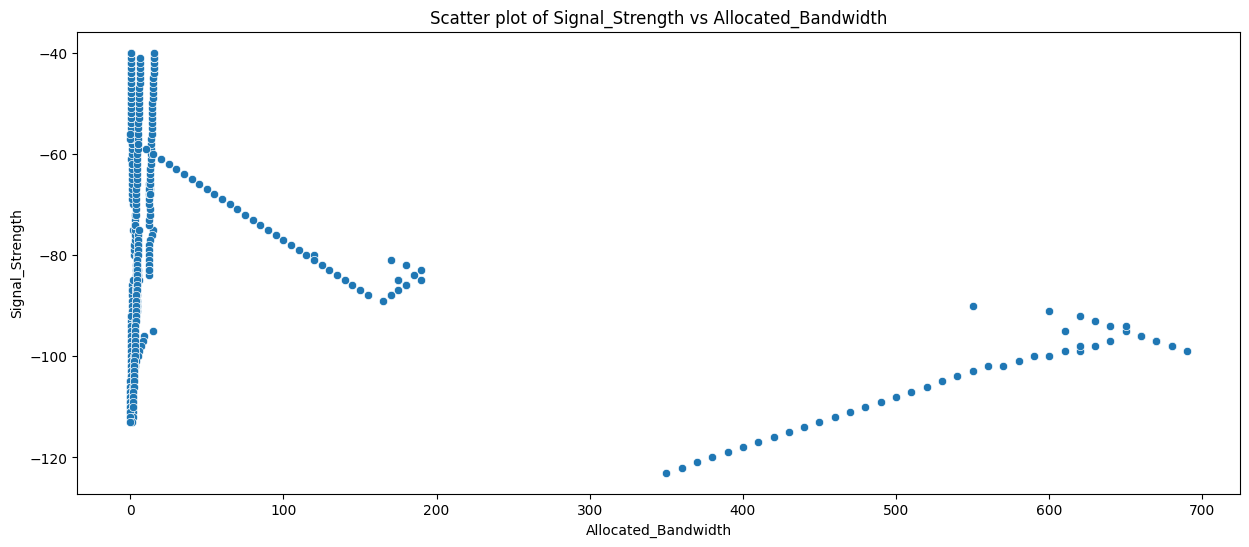

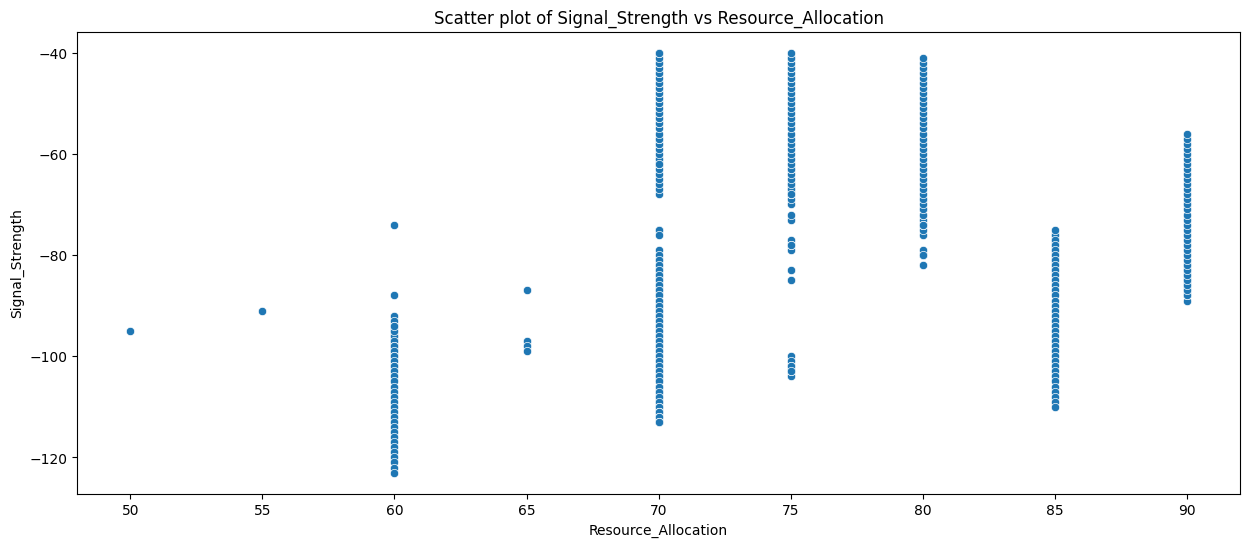

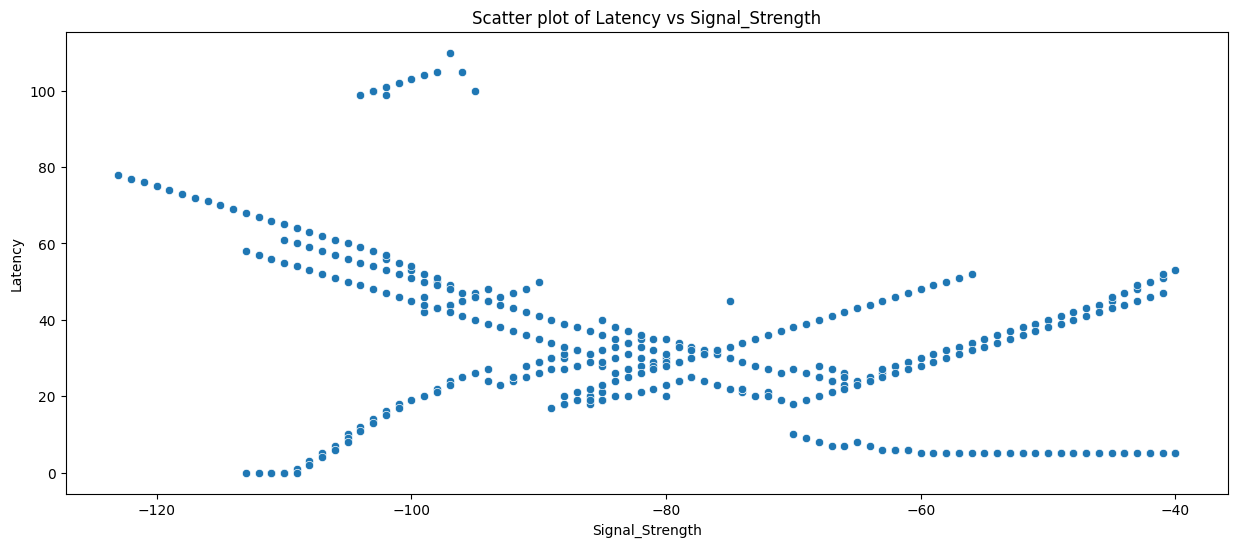

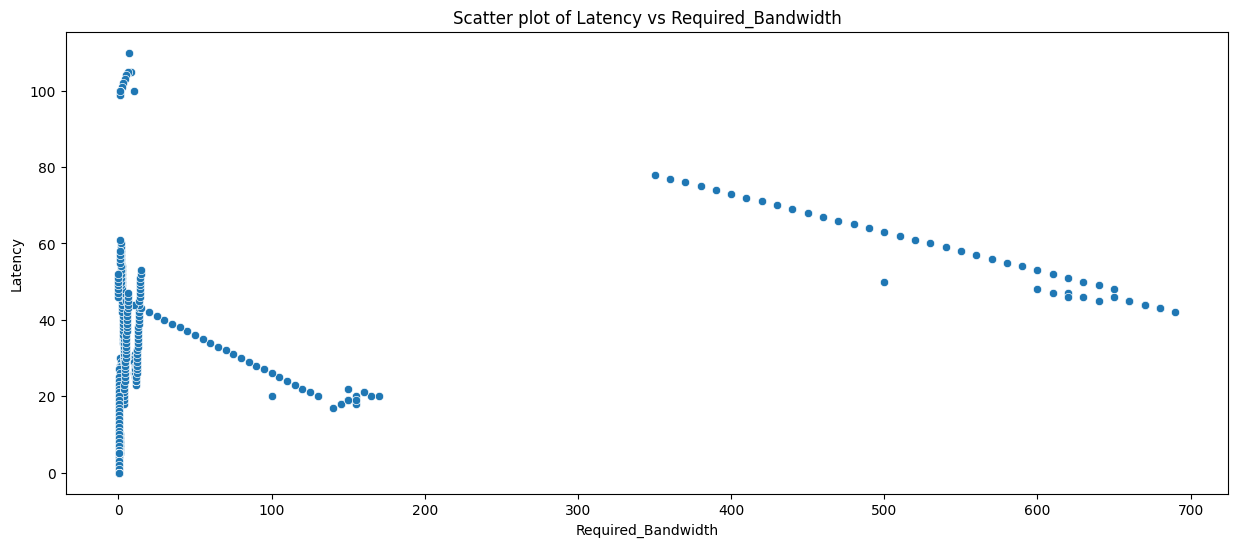

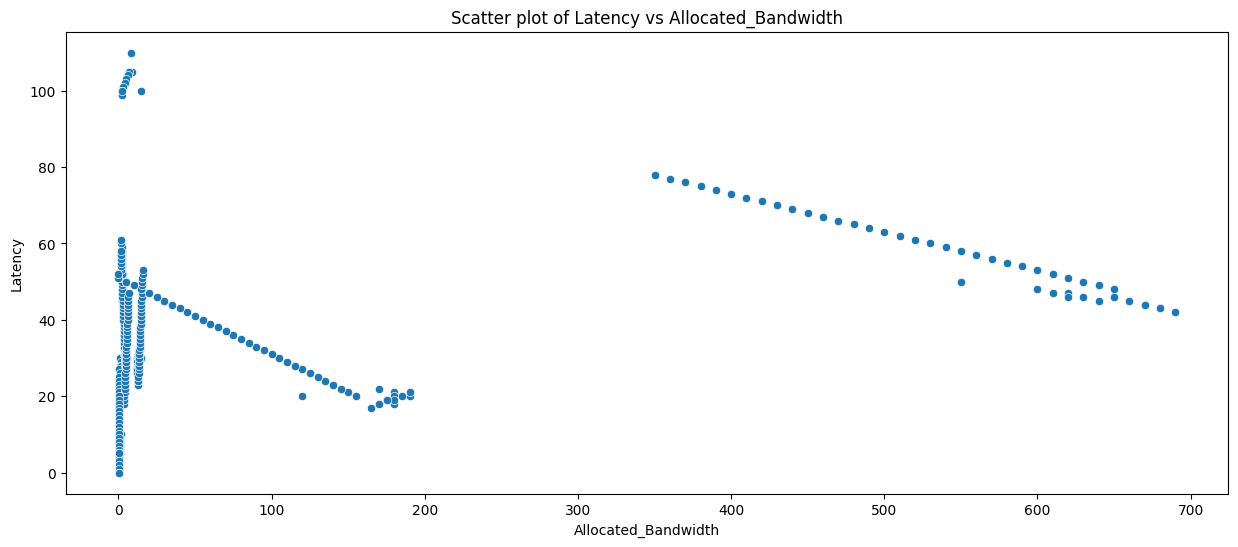

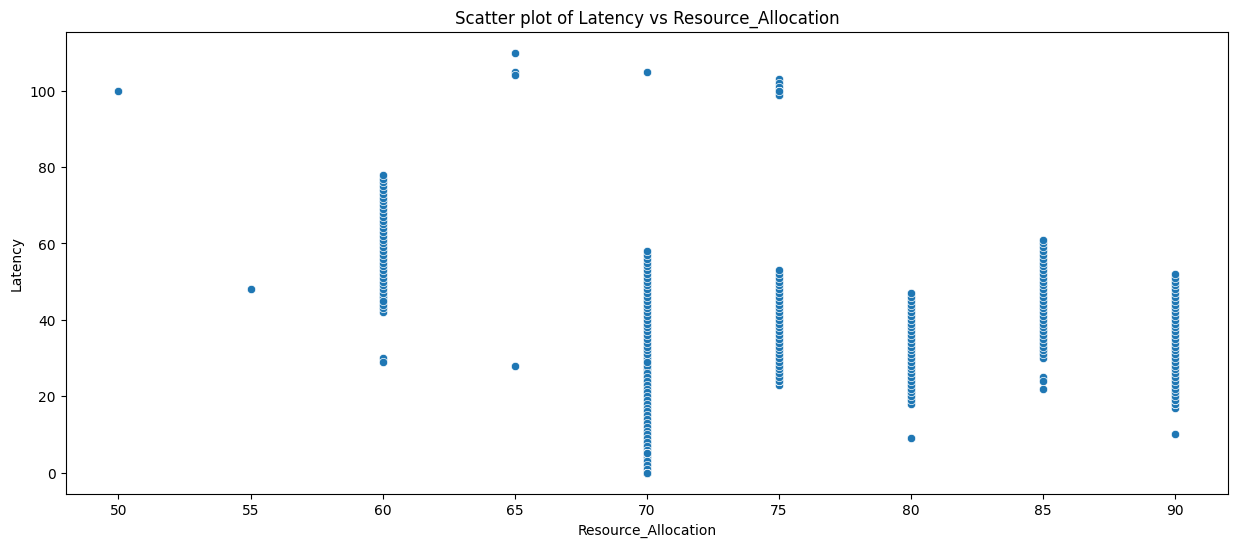

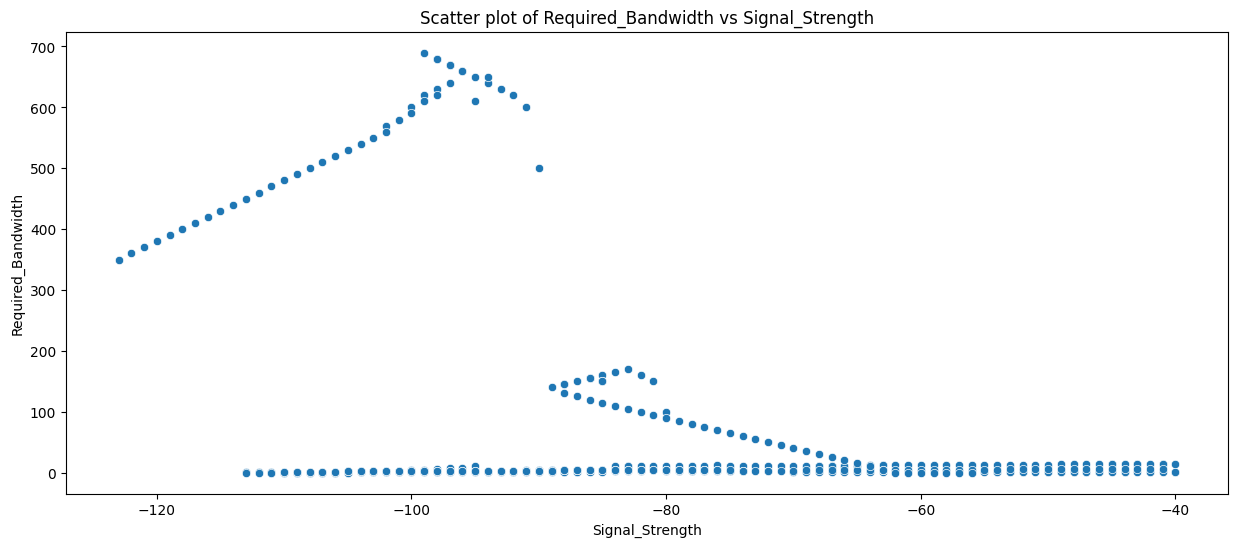

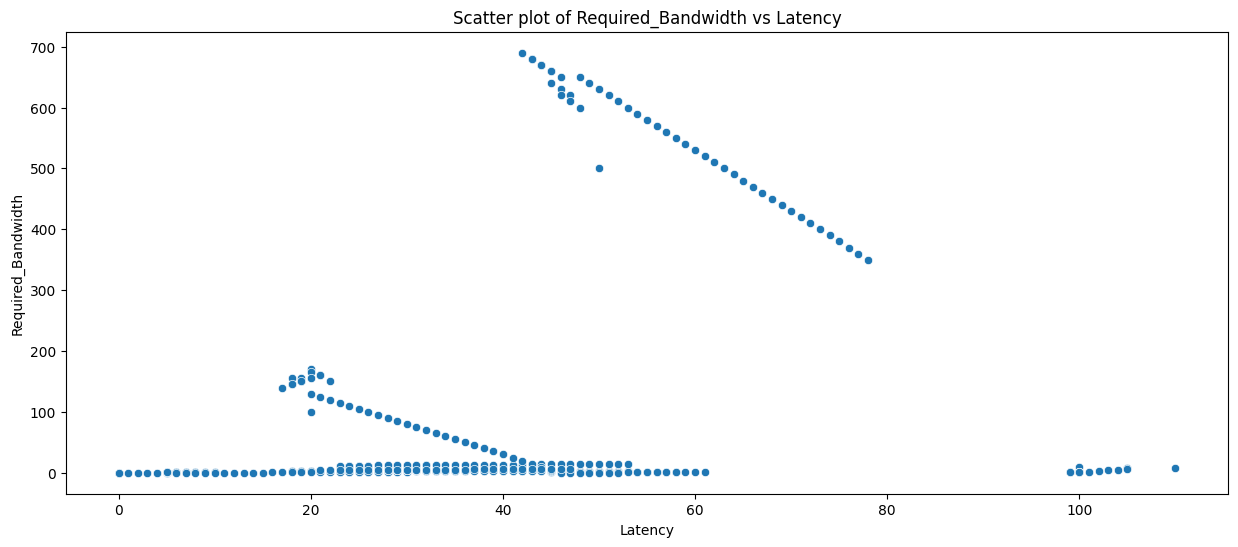

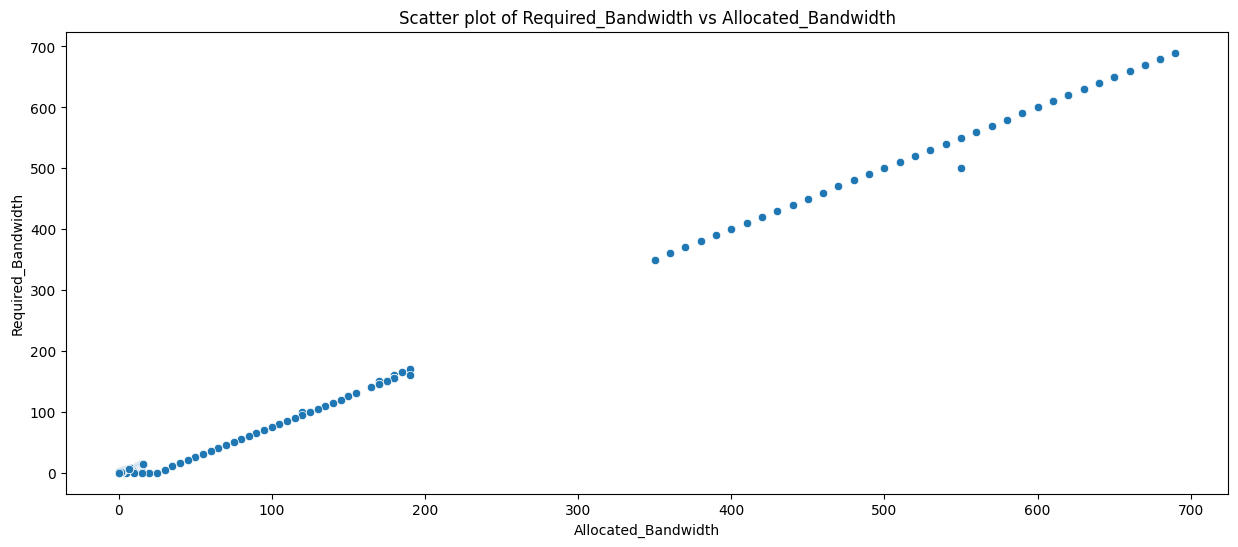

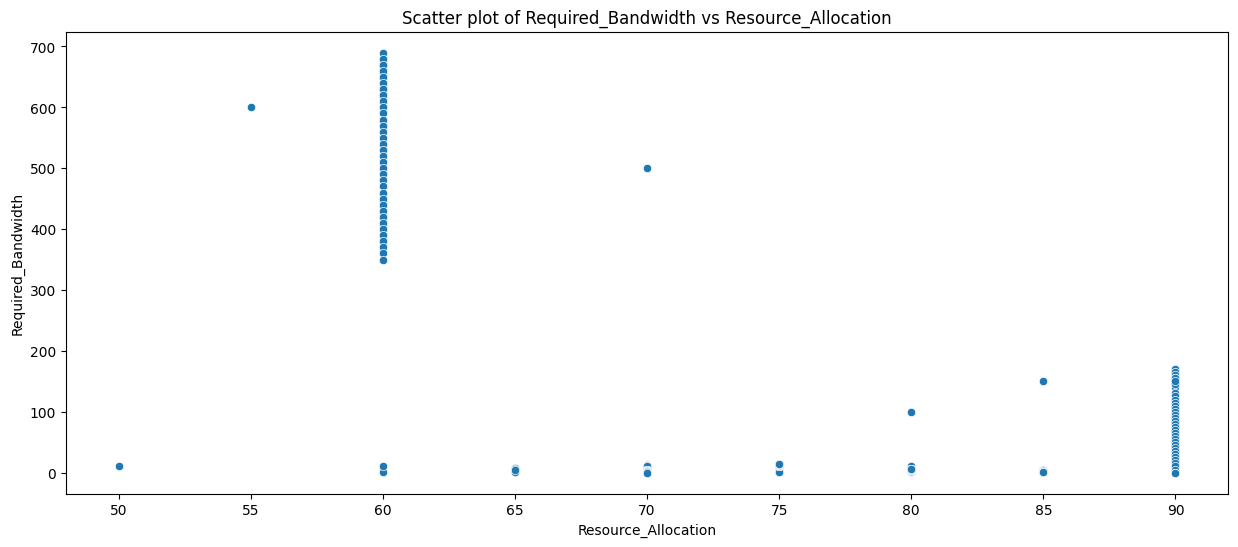

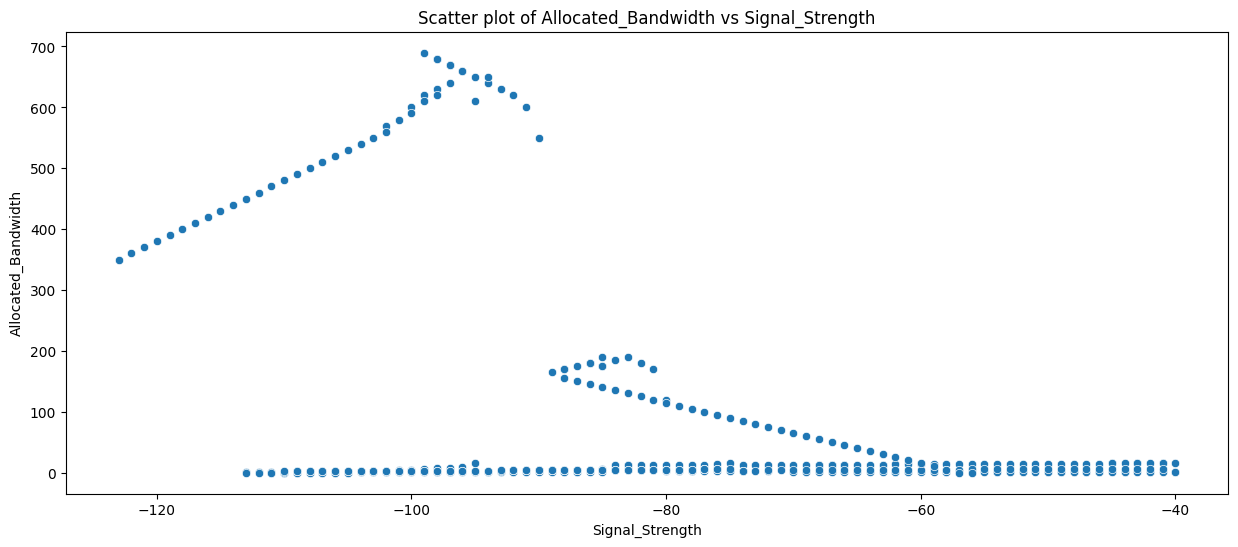

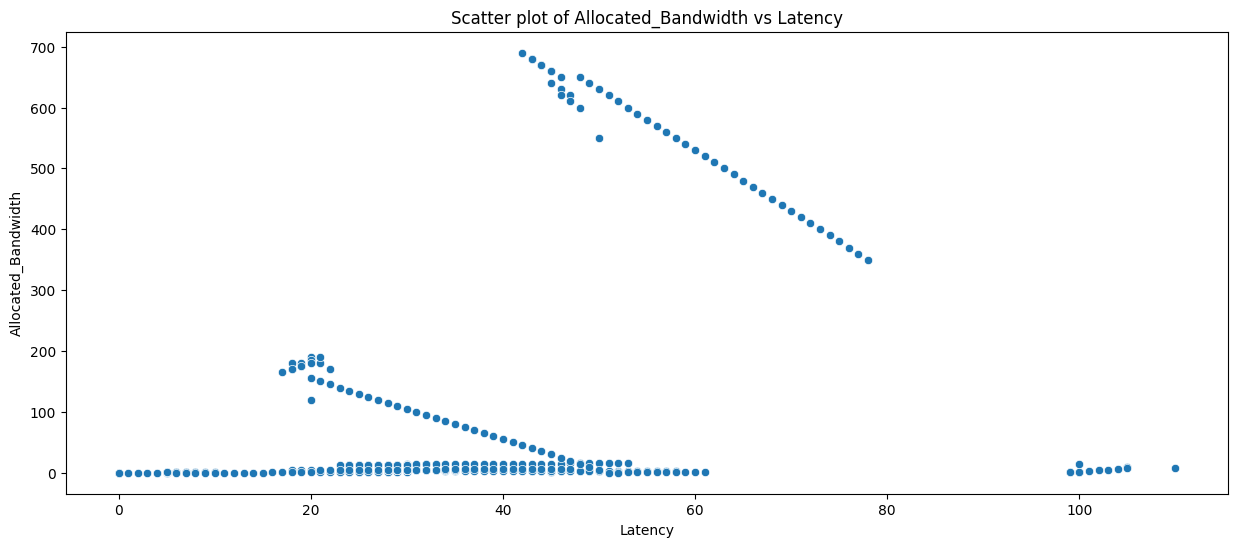

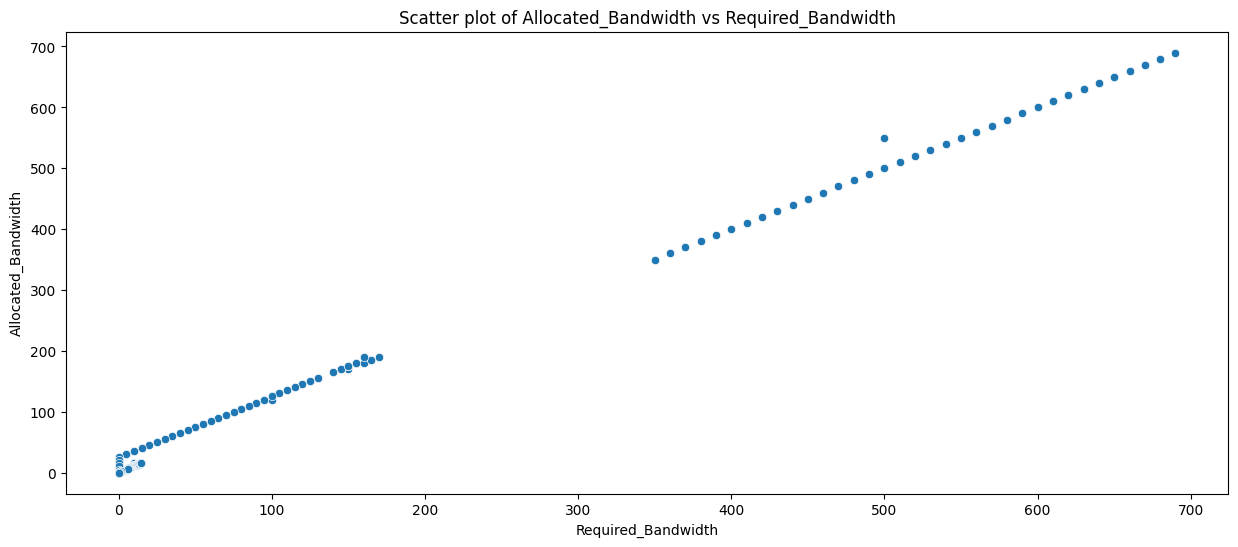

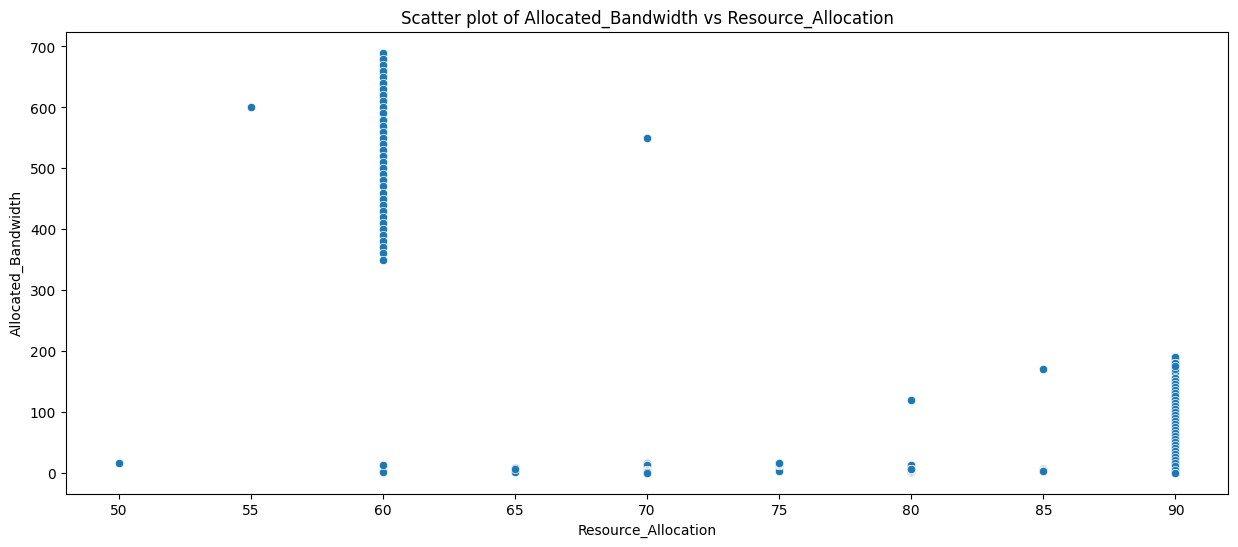

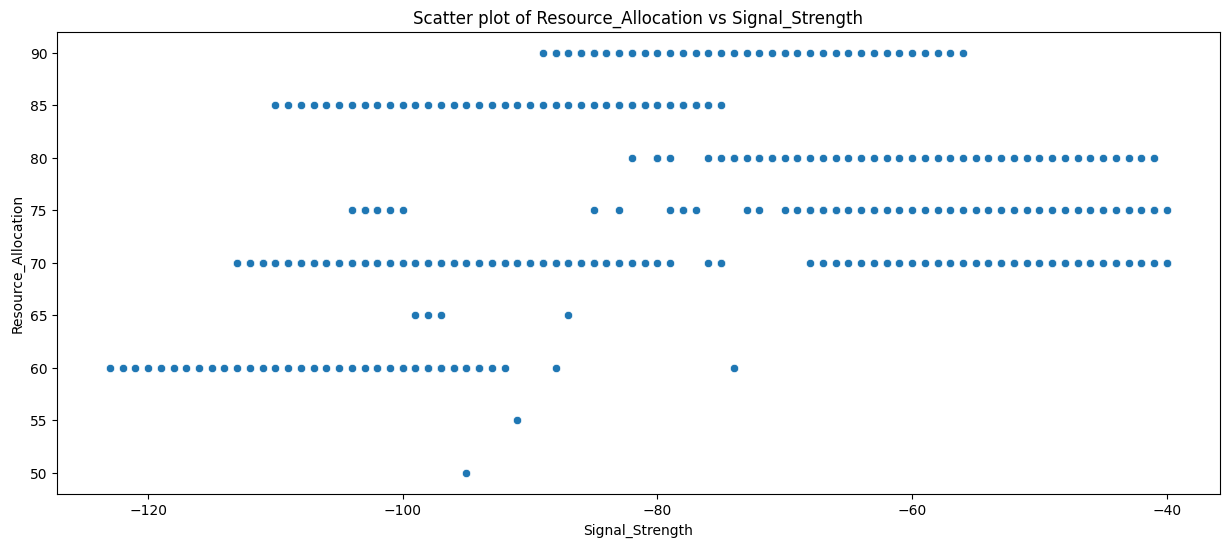

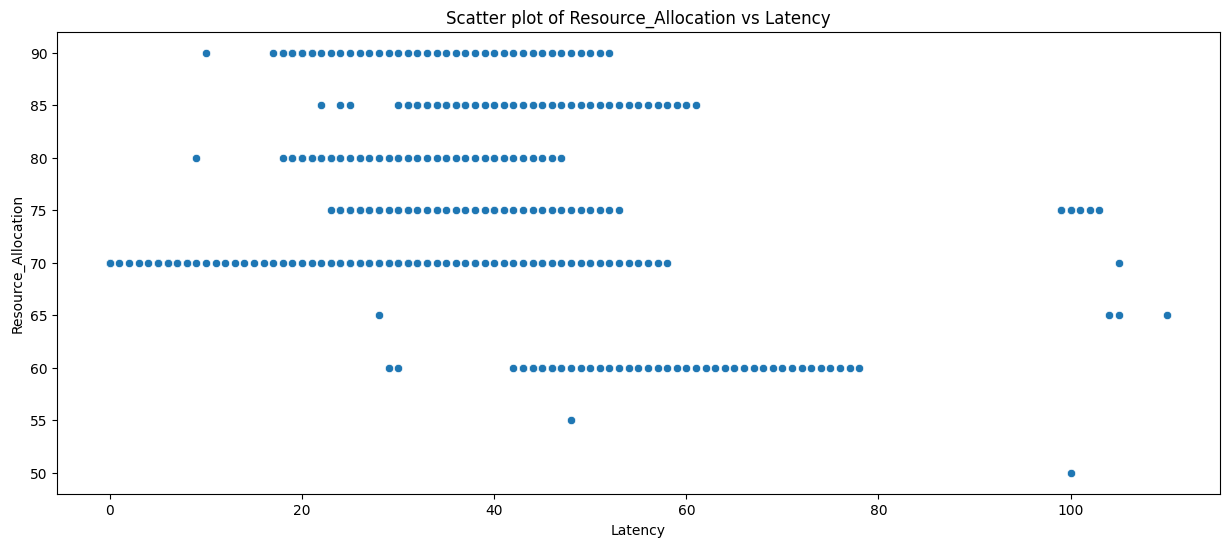

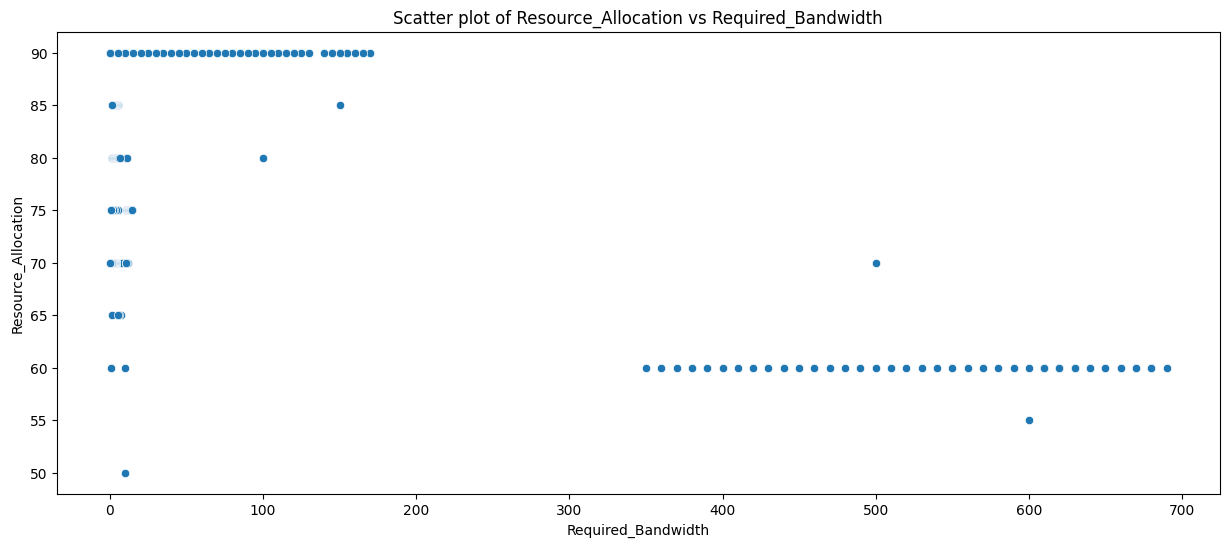

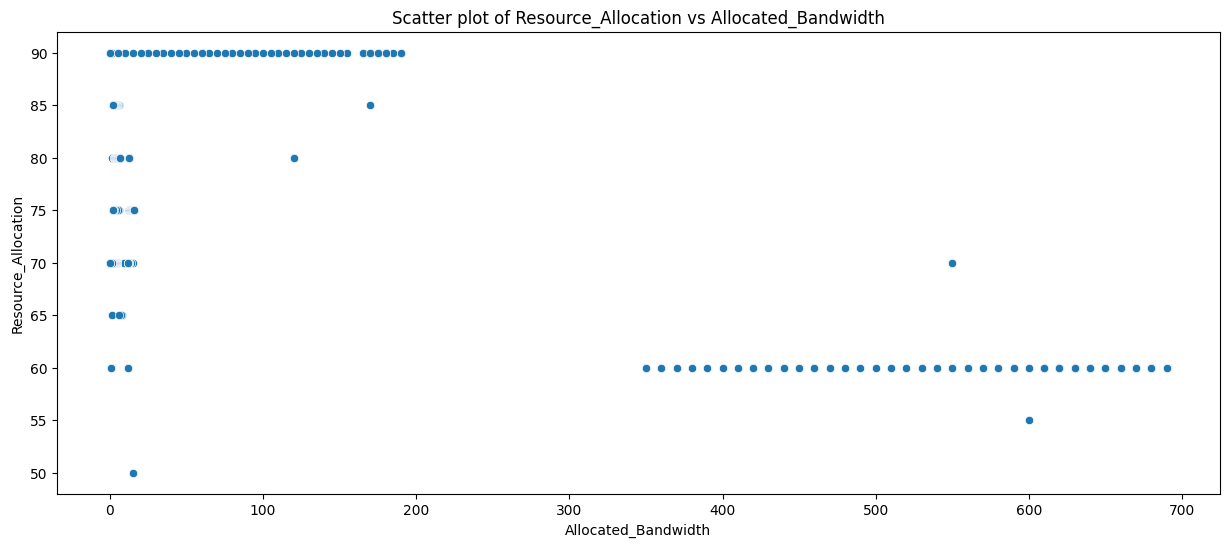

In [ ]:
# Loop through numerical columns
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:  # This ensures that we don't plot the same column against itself
            plt.figure(figsize=(15, 6))
            sns.scatterplot(x=df[j], y=df[i], data=df, palette='hls')
            plt.title(f"Scatter plot of {i} vs {j}")
            plt.show()


In [ ]:
# Loop through numerical columns
for i in numerical_columns:
    # Group by 'Application_Type' and calculate the mean for each numerical column
    grouped_df = df.groupby('Application_Type')[i].mean().reset_index()

    # Create the bar plot using Plotly Express
    fig = px.bar(grouped_df,
                 x='Application_Type',
                 y=i,
                 color='Application_Type',
                 title=f"Average {i} by Application Type")

    # Update layout to make the plot look better (optional)
    fig.update_layout(
        xaxis_title="Application Type",
        yaxis_title=f"Average {i}",
        title=f"Average {i} by Application Type"
    )

    # Show the plot
    fig.show()


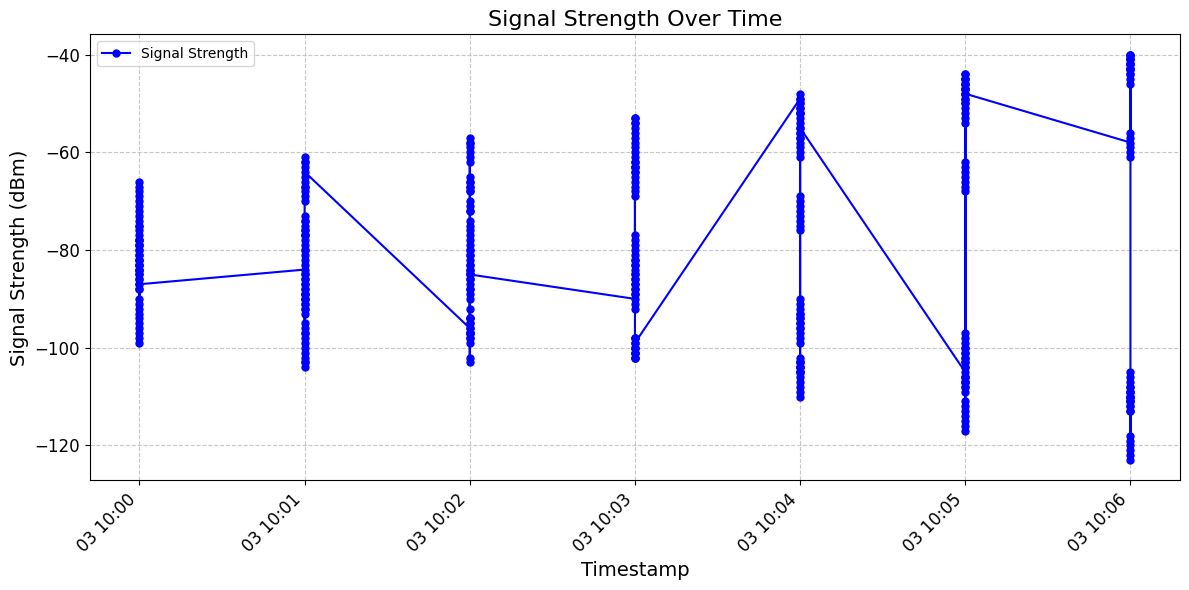

In [ ]:
# Ensure the 'Timestamp' column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort data by 'Timestamp' (optional but recommended for time series data)
df = df.sort_values(by='Timestamp')

# Handle missing data (e.g., forward fill or drop NaN values)
df['Signal_Strength'].fillna(method='ffill', inplace=True)  # Forward fill missing values

# Plotting the Signal Strength over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Signal_Strength'], marker='o', linestyle='-', color='b', markersize=5, label='Signal Strength')

# Labeling the axes and the title
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Signal Strength (dBm)', fontsize=14)
plt.title('Signal Strength Over Time', fontsize=16)

# Formatting x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Enabling grid with customized style
plt.grid(True, linestyle='--', alpha=0.7)

# Optional: Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()


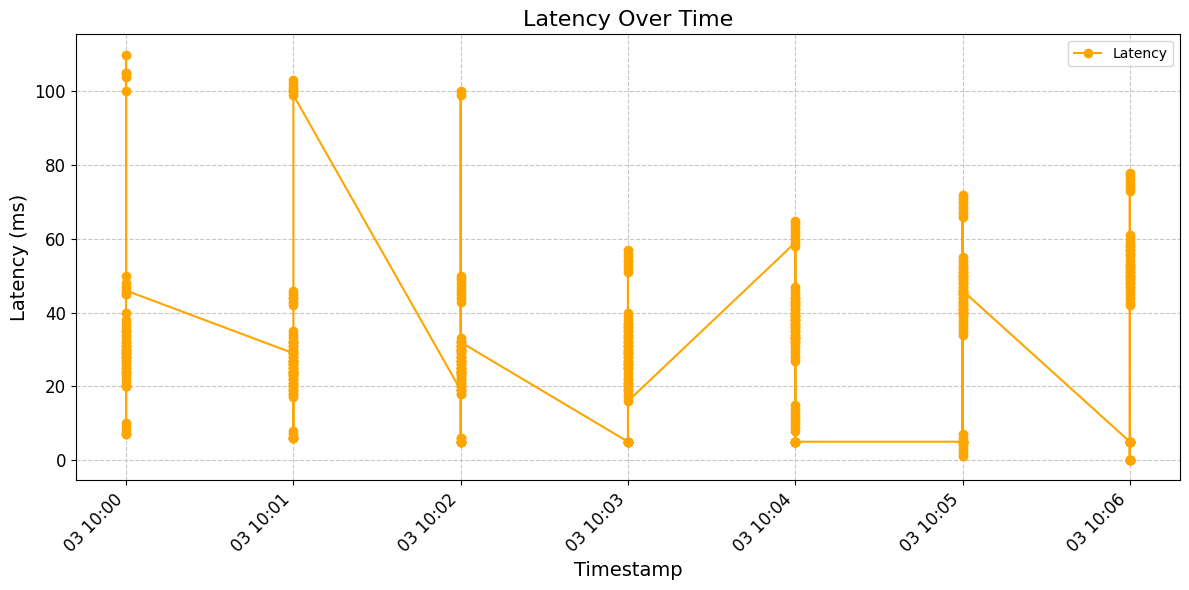

In [ ]:
# Ensure the 'Timestamp' column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the DataFrame by 'Timestamp' to ensure the plot is in chronological order (optional)
df = df.sort_values(by='Timestamp')

# Handle missing data (e.g., forward fill or drop NaN values)
df['Latency'].fillna(method='ffill', inplace=True)  # Forward fill missing values

# Plotting Latency over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Latency'], marker='o', linestyle='-', color='orange', markersize=6, label='Latency')

# Labeling the axes and the title
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Latency (ms)', fontsize=14)
plt.title('Latency Over Time', fontsize=16)

# Formatting x-axis labels to avoid overlap and ensure readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Enabling grid with customized style
plt.grid(True, linestyle='--', alpha=0.7)

# Optional: Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()


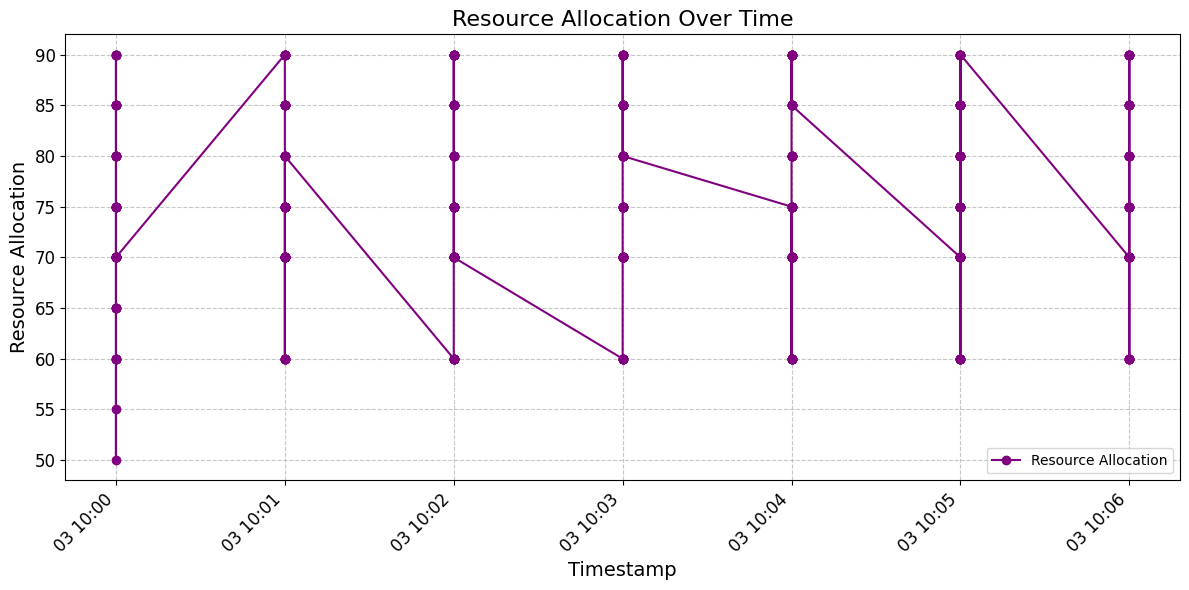

In [ ]:
# Ensure the 'Timestamp' column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the data by Timestamp (optional but recommended for time series data)
df = df.sort_values(by='Timestamp')

# Handle missing data (e.g., forward fill or drop NaN values)
df['Resource_Allocation'].fillna(method='ffill', inplace=True)  # Forward fill missing values

# Plotting Resource Allocation over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Resource_Allocation'], marker='o', linestyle='-', color='purple', markersize=6, label='Resource Allocation')

# Labeling the axes and the title
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Resource Allocation', fontsize=14)
plt.title('Resource Allocation Over Time', fontsize=16)

# Formatting x-axis labels to avoid overlap and ensure readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Enabling grid with customized style
plt.grid(True, linestyle='--', alpha=0.7)

# Optional: Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()


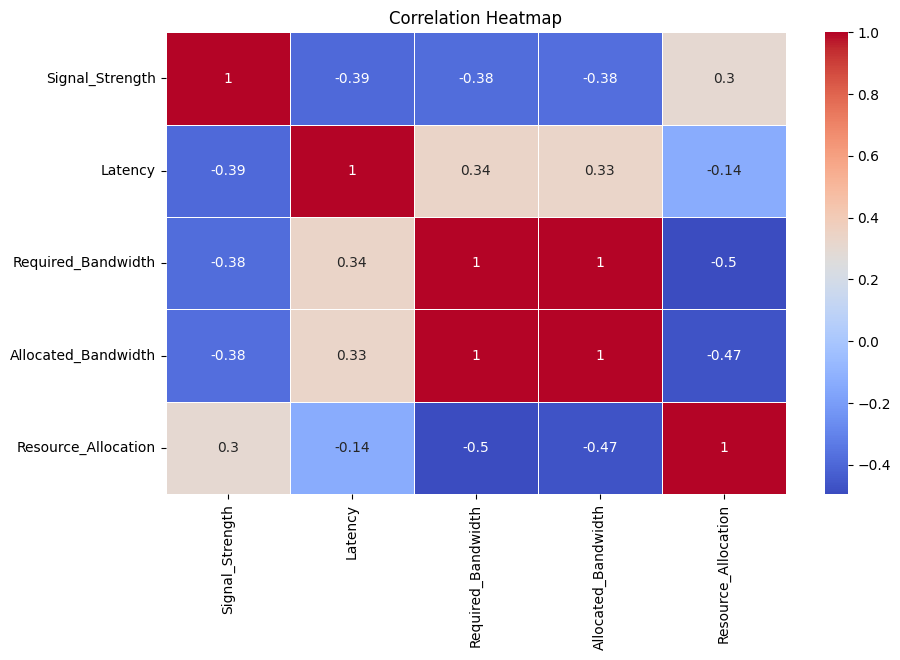

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical columns in your DataFrame
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df[['Signal_Strength', 'Required_Bandwidth']]
y = df['Resource_Allocation']

In [ ]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 62.08690593045314
R-squared: 0.19088536356159613


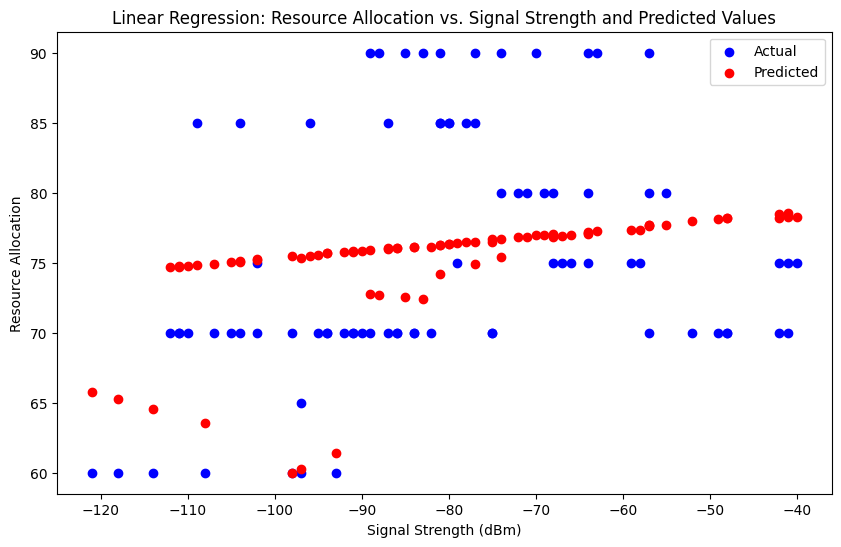

In [ ]:
# Assuming y_pred is already generated from your model, e.g., using: y_pred = model.predict(X_test)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Signal_Strength'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Signal_Strength'], y_pred, color='red', label='Predicted')

# Labeling the axes and adding the title
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('Resource Allocation')
plt.legend()
plt.title('Linear Regression: Resource Allocation vs. Signal Strength and Predicted Values')

# Show the plot
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
degree = 5
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_poly = polyreg.predict(X_test)

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression - Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression - R-squared: {r2_poly}')

Polynomial Regression - Mean Squared Error: 31.23864835664919
Polynomial Regression - R-squared: 0.5928989014812567


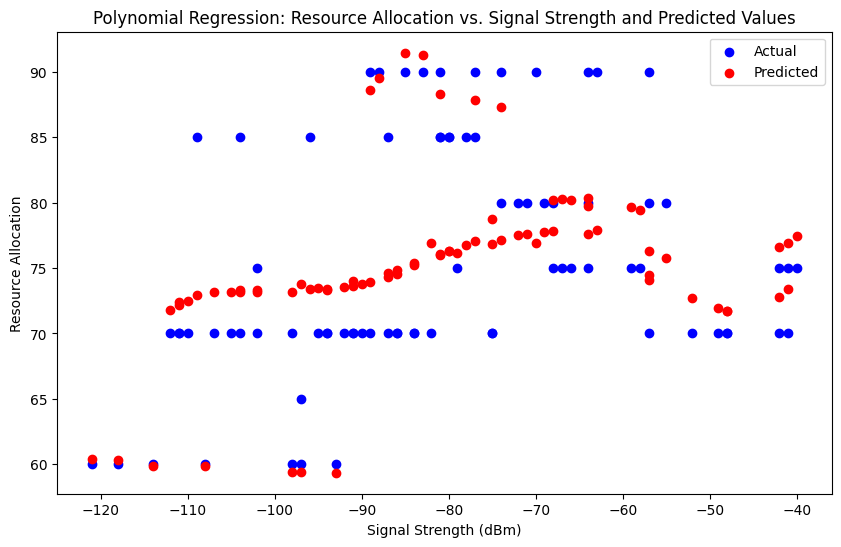

In [ ]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Signal_Strength'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Signal_Strength'], y_pred_poly, color='red', label='Predicted')

# Labeling the axes and adding the title
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('Resource Allocation')
plt.legend()
plt.title('Polynomial Regression: Resource Allocation vs. Signal Strength and Predicted Values')

# Show the plot
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
# Feature selection: Using Signal_Strength and Required_Bandwidth as predictors
X = df[['Signal_Strength', 'Required_Bandwidth']]
y = df['Resource_Allocation']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Setting up the XGBoost model for hyperparameter tuning
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [ ]:
# Best model after tuning
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Accuracy): {r2 * 100:.2f}%")

Best Model Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Mean Squared Error: 24.604378763803833
R-squared (Accuracy): 71.92%


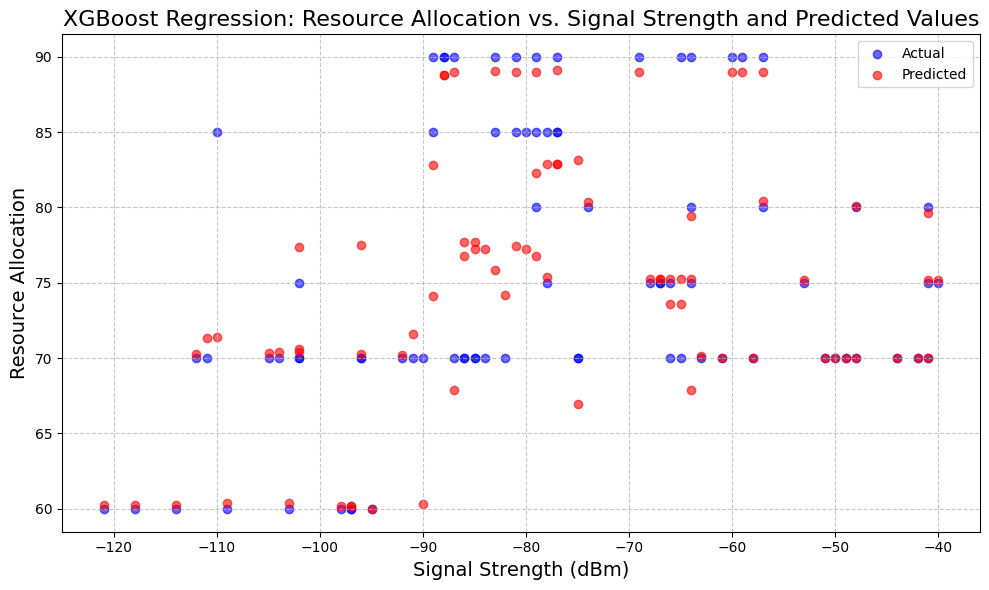

In [ ]:
# Scatter plot for actual vs predicted values with Signal Strength
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Signal_Strength'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['Signal_Strength'], y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Signal Strength (dBm)', fontsize=14)
plt.ylabel('Resource Allocation', fontsize=14)
plt.title('XGBoost Regression: Resource Allocation vs. Signal Strength and Predicted Values', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Feature selection: Using Signal_Strength and Required_Bandwidth as predictors
X = df[['Signal_Strength', 'Required_Bandwidth']]
y = df['Resource_Allocation']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Setting up the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [4, 6, 8],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Accuracy): {r2 * 100:.2f}%")


Best Model Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 21.352606715006424
R-squared (Accuracy): 75.63%


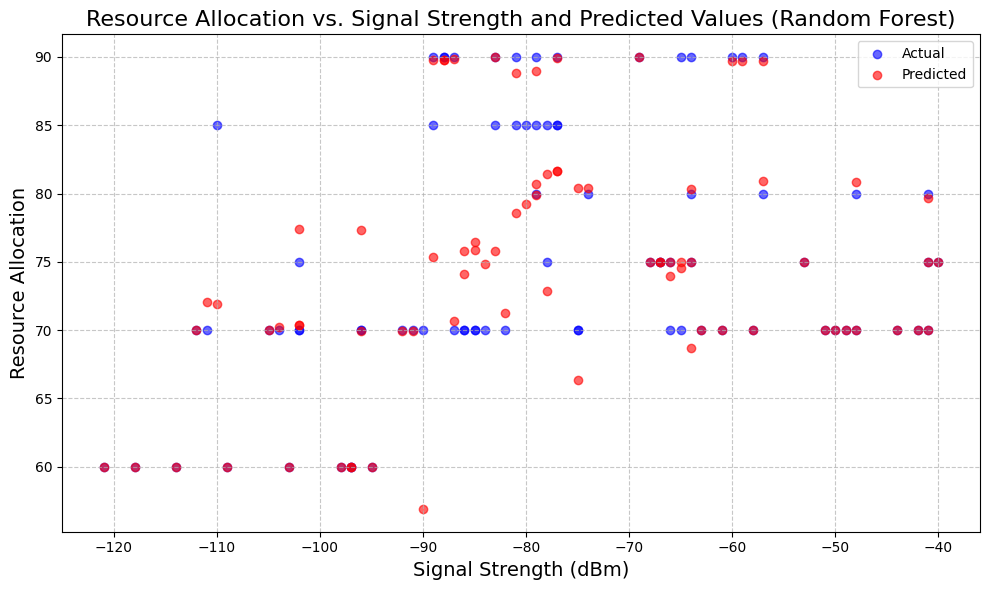

In [ ]:
# Scatter plot for actual vs predicted values with Signal Strength
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Signal_Strength'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['Signal_Strength'], y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Signal Strength (dBm)', fontsize=14)
plt.ylabel('Resource Allocation', fontsize=14)
plt.title('Resource Allocation vs. Signal Strength and Predicted Values (Random Forest)', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
